# Machine Learning - TP2

Dans ce deuxième TP, vous allez gérer un dataset un peu plus compliqué que précédemment, afin de pouvoir appliquer un algorithme de ML sur ces données et obtenir les meilleures performances possibles.

On utilise des données concernant des campagnes de démarche téléphonique pour la souscription de prêts ; on cherche à prédire si un client est susceptible de souscrire à un prêt, avant de l'appeler. Le nombre de commerciaux étant limité, l'objectif métier est de concentrer le démarchage sur les clients les plus susceptibles, et de ne pas démarcher les clients non susceptibles, afin de maximiser les profits.

Les données (d'entraînement et de test) sont disponibles dans `bank-full.csv`.

Malheureusement, mon chien numérique a mangé mon CSV : il manque des données à certains endroits, et les *features* n'ont pas forcément un type approprié ! Une des parties du TP sera consacrée au nettoyage, avant de pouvoir appliquer les algorithmes de ML.

<details>
<summary>Description des colonnes</summary>

| Nom       | Description                                                  |
|-----------|--------------------------------------------------------------|
| age       | Âge de l'individu                                            |
| job       | Type de job                                                  |
| marital   | Statut marital (note : divorcé comprend aussi veuf)          |
| education | Niveau d'éducation                                           |
| default   | Est-ce que l'individu a déjà échoué à rembourser un crédit ? |
| balance   | Solde annuel moyen                                           |
| housing   | Est-ce que l'individu a un prêt immobilier en cours ?        |
| loan      | Est-ce que l'individu a un prêt personnel en cours ?         |
| contact   | Moyen de communication avec l'individu                       |
| day       | Jour de la semaine du dernier contact                        |
| month     | Mois du dernier contact                                      |
| duration  | Durée en secondes du dernier contact (appel)                 |
| campaign  | Nombre de contacts effectués durant cette campagne           |
| pdays     | Nombre de jours écoulés depuis le dernier contact            |
| previous  | Nombre de contacts avant cette campagne                      |
| poutcome  | Résultat de la précédente campagne                           |
| y         | Cible de prédiction : l'individu a-t-il souscrit un prêt ?   |

</details>

Comme précédemment, ce TP est un Jupyter Notebook à compléter. Vous pouvez à nouveau utiliser Google Colab, Jupyter Lab, ou l'IDE de votre choix. Aucun paquet Python additionnel n'est requis (par rapport au TP1), donc si NumPy, Pandas, Matplotlib, Seaborn, et Scikit-learn sont déjà installés, vous n'avez rien de plus à faire.

Attention : le *dataset* est un peu plus conséquent que la dernière fois. Si votre PC se rapproche plus d'une pomme de terre trop cuite que d'une fusée Ariane, et que les calculs sont trop longs, vous pouvez prendre un sous-ensemble des données pour limiter les calculs (mais vous aurez de moins bonnes performances).

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parce qu'on m'a fait remarquer que `sns.set()` était déprécié, j'ai remplacé par `sns.set_theme()`
# qui fait exactement la même chose mais qui n'est pas déprécié ! ;-)
sns.set_theme(style="dark")

## Exercice 1 : Analyse Exploratoire des Données (EDA)

Dans cet exercice, on commence par "voir" à quoi ressemble les données. Les informations collectées durant cette phase seront utiles pour les exercices suivants. Par exemple, essayez de réfléchir par avance à quelle sorte d'encodage ou de normalisation serait appropriée pour chaque *feature* !

Q1. Chargez le *dataset* dans des DataFrame `df`.

<details>
<summary>Astuce</summary>

Si le DataFrame ne semble pas cohérent, regardez d'abord le CSV pour en déduire comment configurer la lecture / *parsing* !
</details>

In [32]:
df = pd.read_csv("bank-full.csv", sep=";")

Q2. Quelle est la taille de ce *dataset* ? (nombre de lignes, nombre de colonnes)

In [33]:
df.shape

(45211, 17)

Q3. Quels sont les types des colonnes ?

In [34]:
df.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object

Q4. Où se trouvent les données manquantes ?

Attention : on veut savoir à la fois quelles **colonnes** contiennent des données manquantes (et en quelle proportion), et quelles **lignes** contiennent des données manquantes (et en quelle proportion).
Vous êtes libre de la visualisation de votre choix, du moment qu'elle vous apporte la réponse (graphique, texte, ...).

<details>
<summary>Astuce</summary>

Une [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) peut être intéressante pour visualiser la présence de données manquantes en même temps sur les lignes et sur les colonnes : une couleur peut indiquer la présence de données, et une autre l'absence (donc données manquantes).
</details

<Axes: >

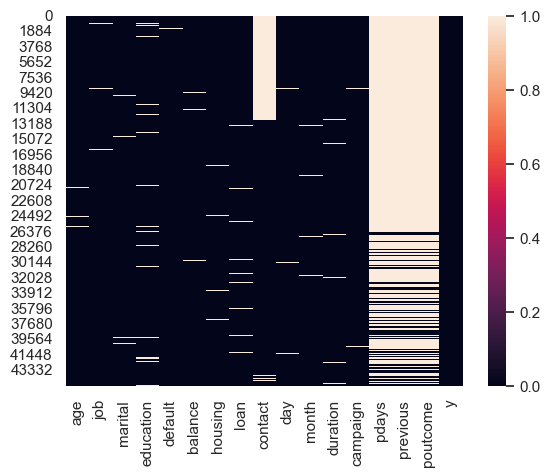

In [35]:
# visualisation des données manquantes
sns.heatmap(df.isnull())

Q5. Faites une analyse univariée (**textuelle** et **graphique**) pour chaque colonne. Choisissez les visualisations et les statistiques les plus appropriées selon qu'il s'agisse de données quantitatives ou qualitatives.

In [36]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,44736.000000,44726.000000,44753.000000,44772.000000,44778.000000,8257.000000,8257.000000
mean,40.934952,1365.456267,15.804929,258.137095,2.765867,224.577692,3.177546
std,10.619590,3052.643742,8.320741,257.625309,3.099886,115.344035,4.560820
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,33.000000,72.250000,8.000000,103.000000,1.000000,133.000000,1.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,194.000000,2.000000
75%,48.000000,1430.000000,21.000000,319.000000,3.000000,327.000000,4.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

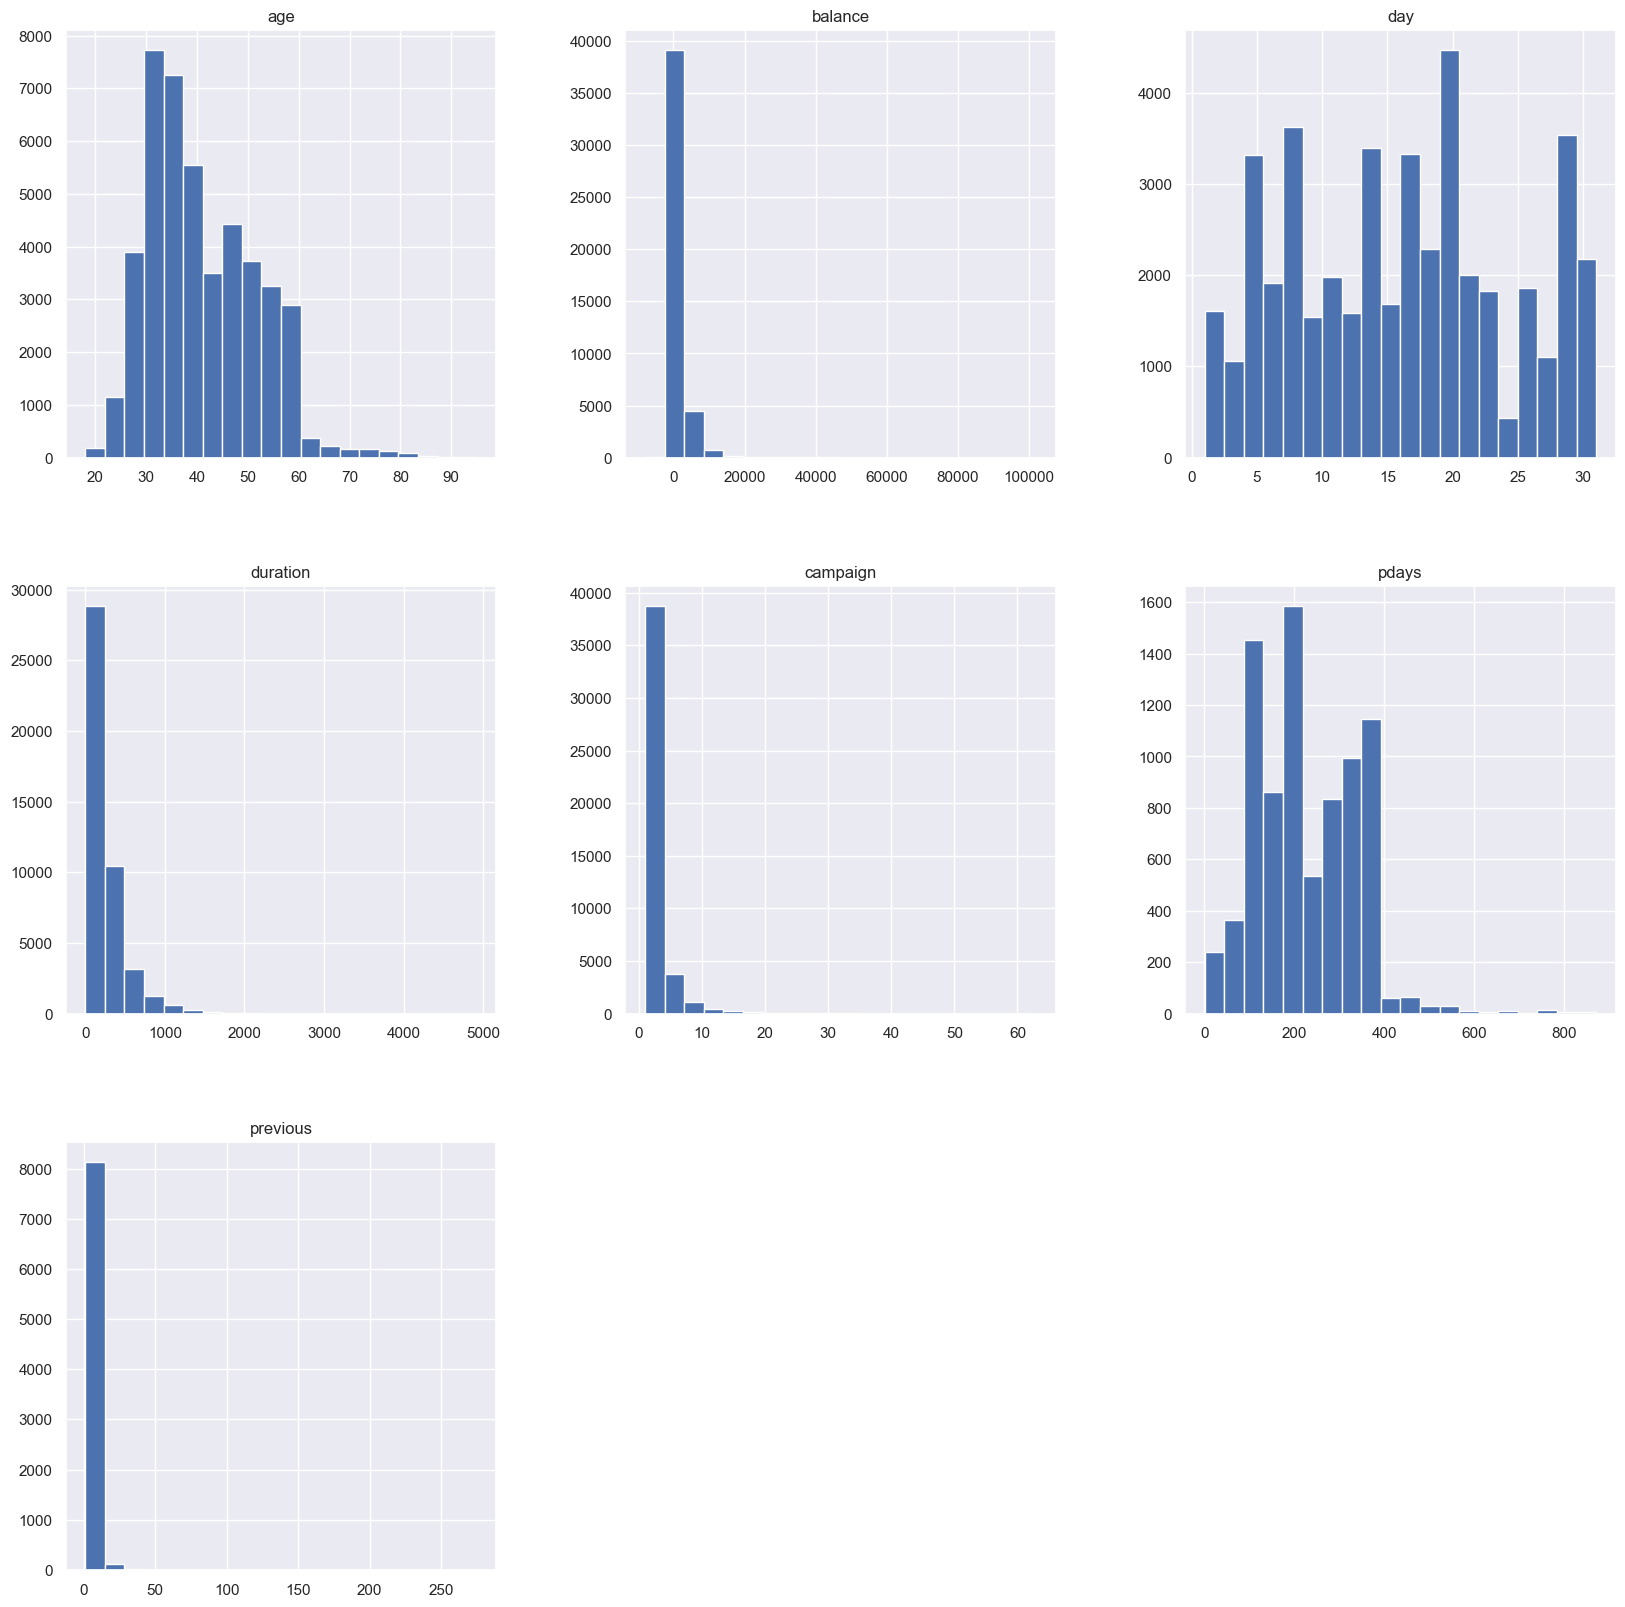

In [37]:
# for c in df.columns:
#     sns.histplot(df[c])
df.hist(figsize=(20, 20), bins=20)

Q6. Faites une analyse bivariée (**graphique**). On s'intéresse en particulier aux relations entre les données quantitatives et qualitative.

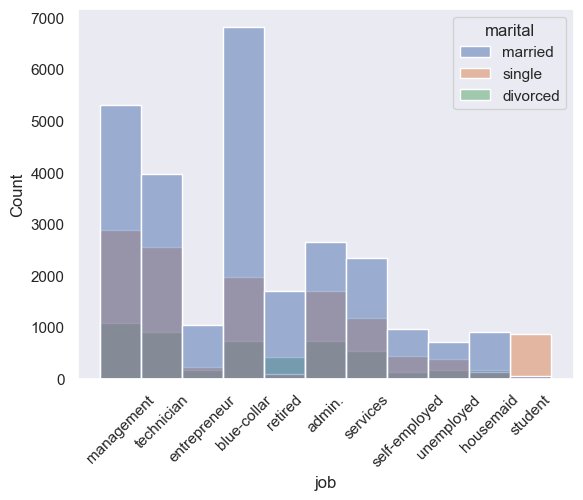

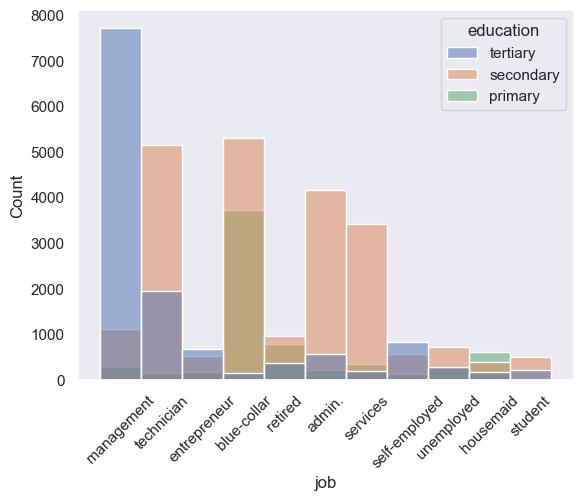

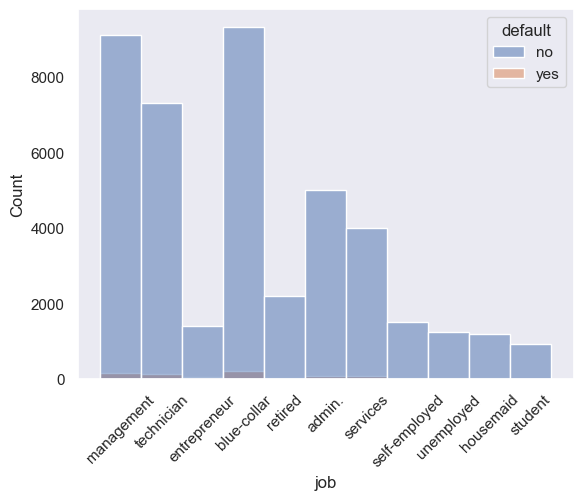

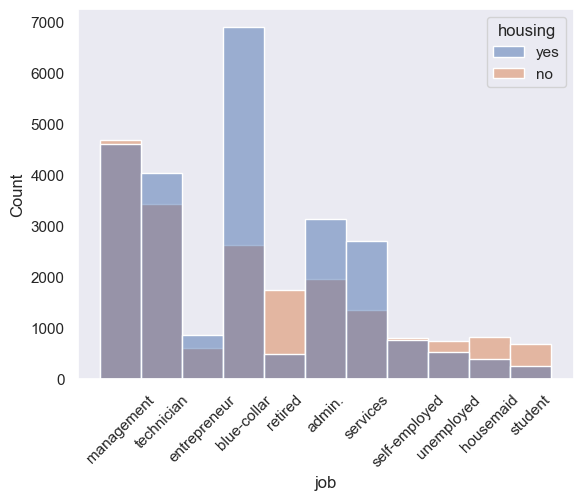

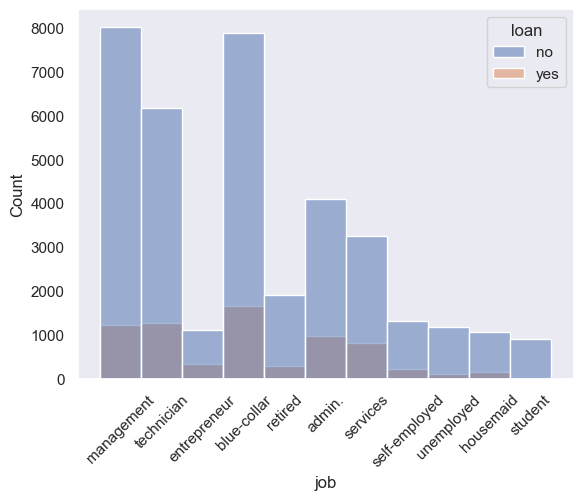

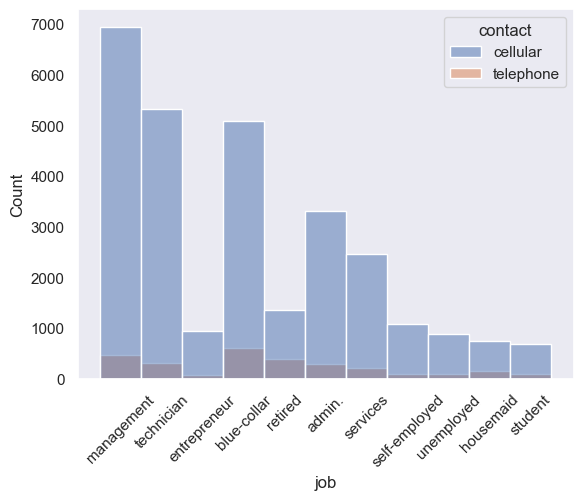

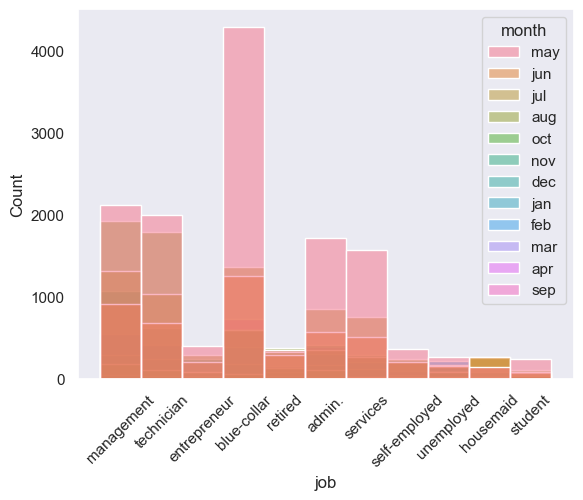

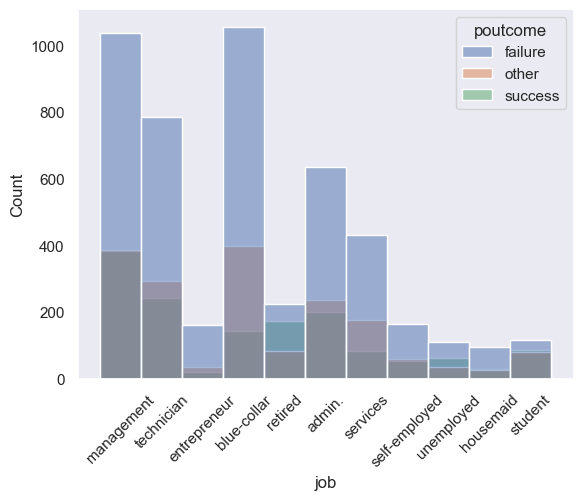

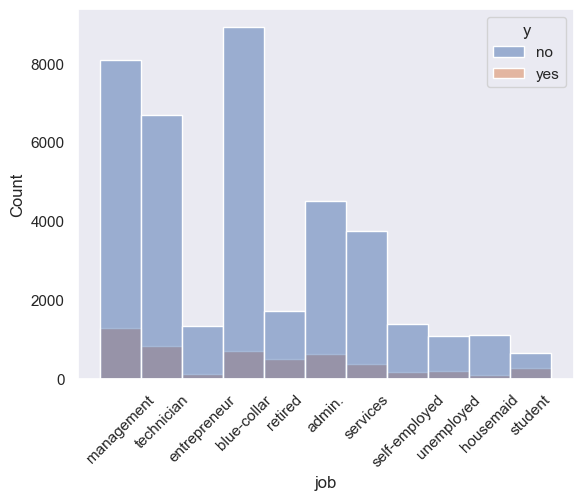

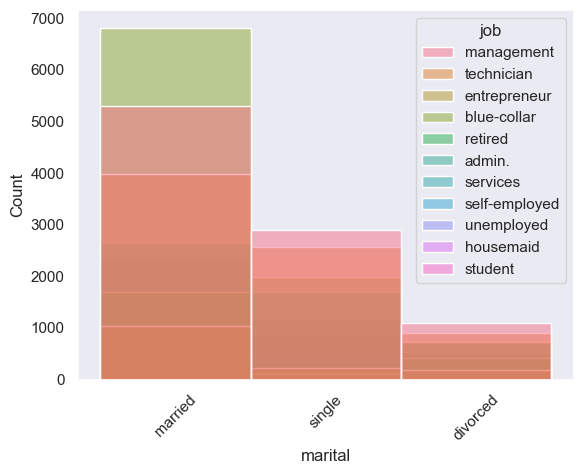

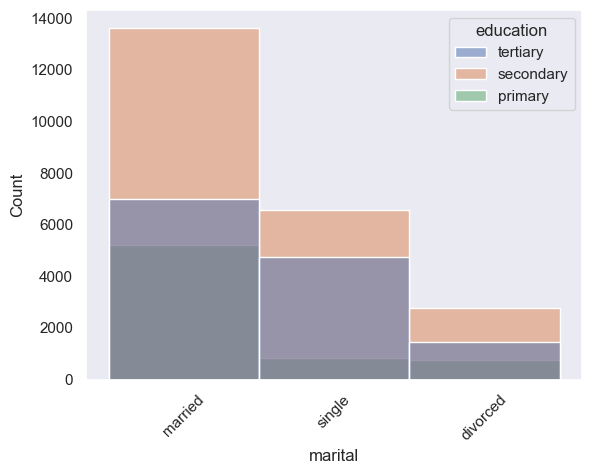

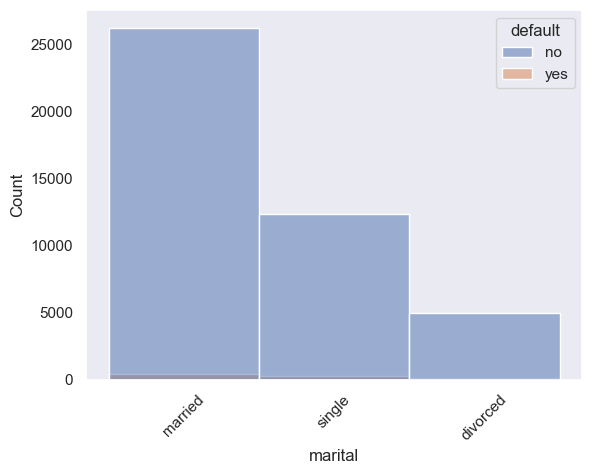

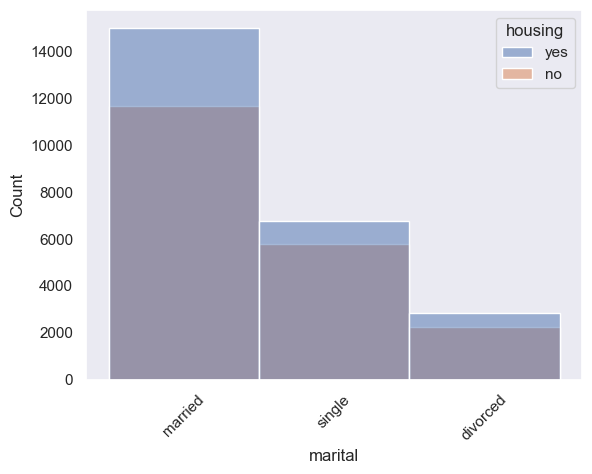

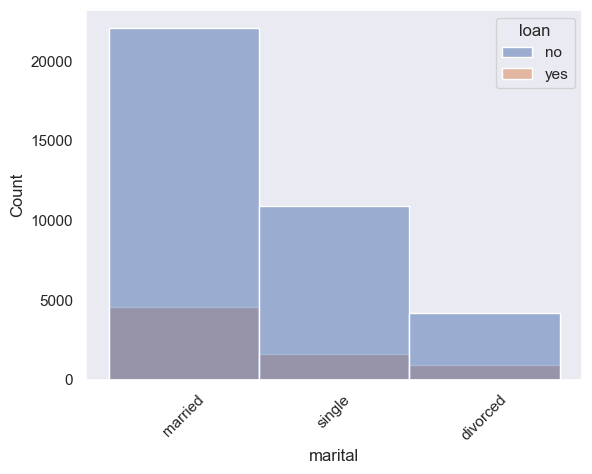

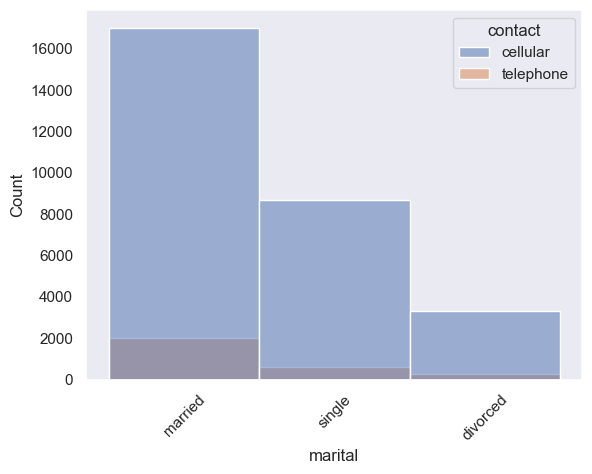

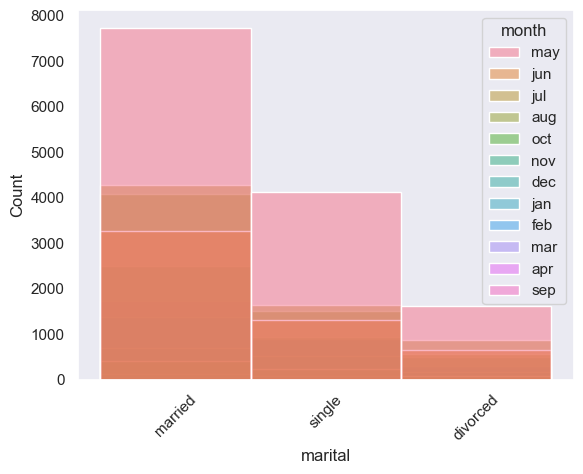

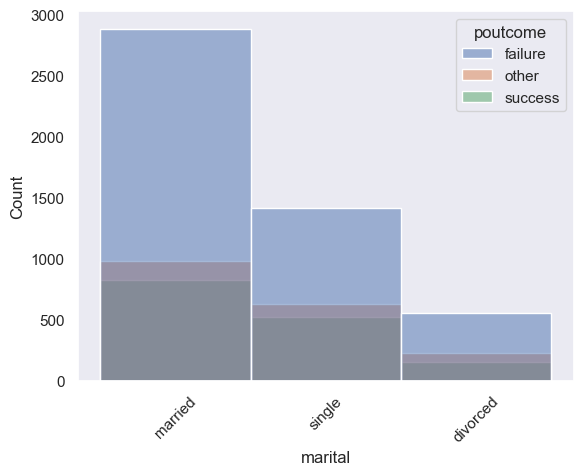

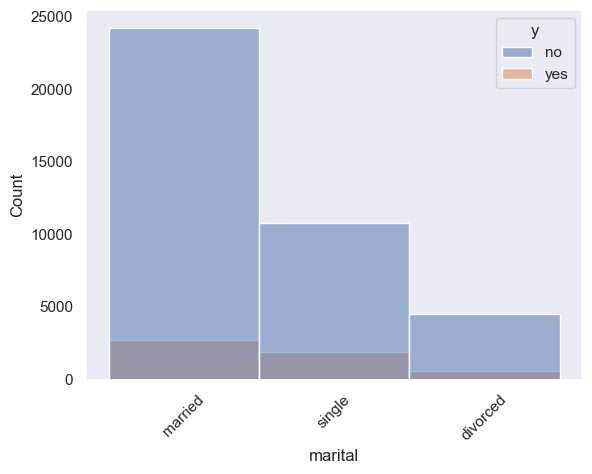

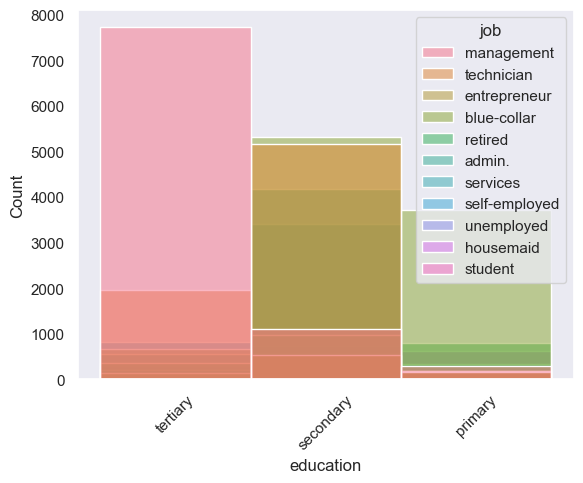

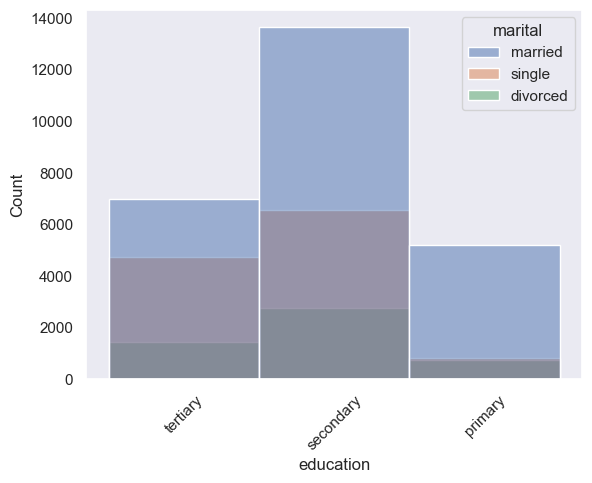

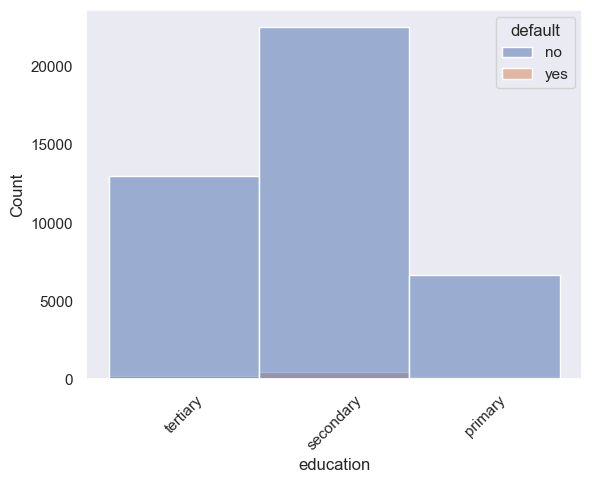

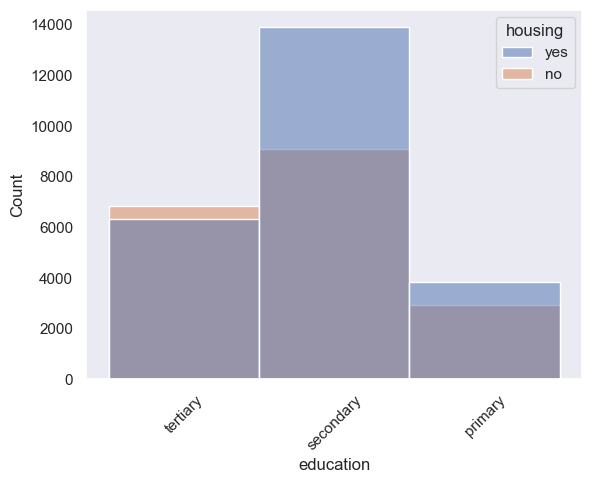

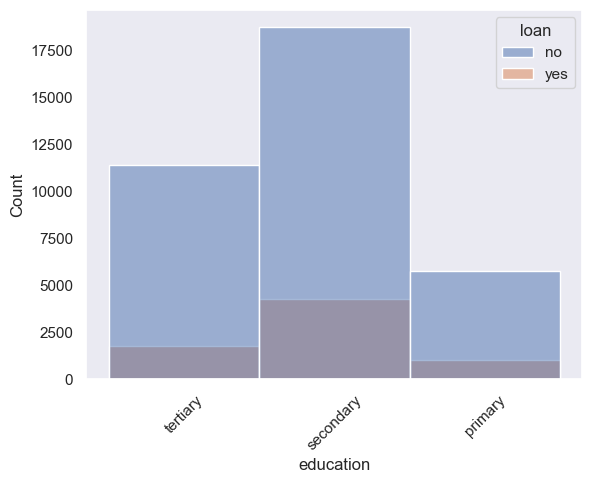

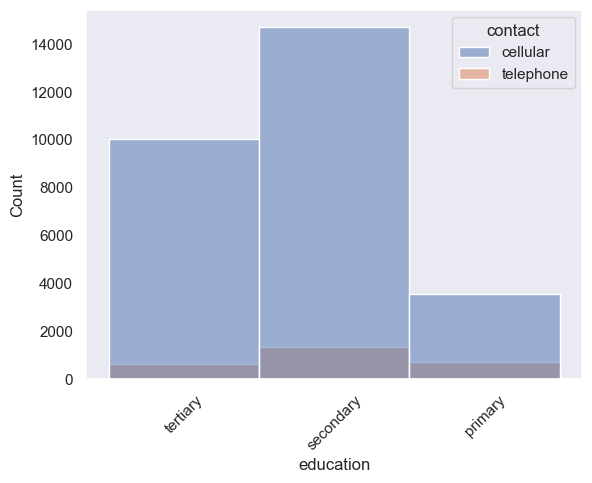

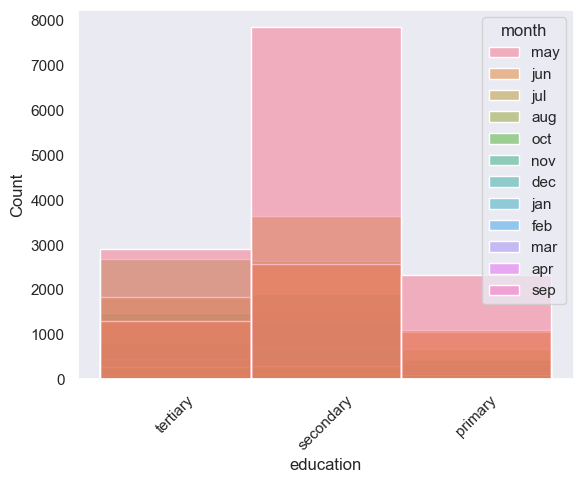

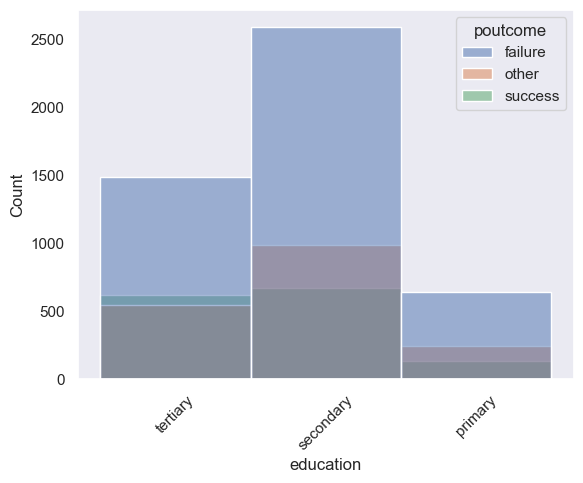

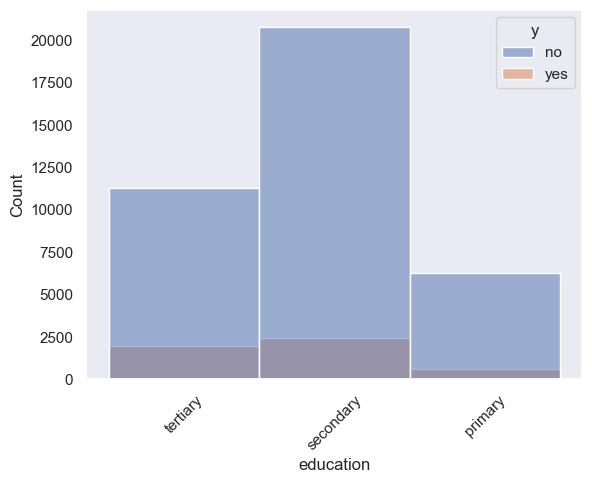

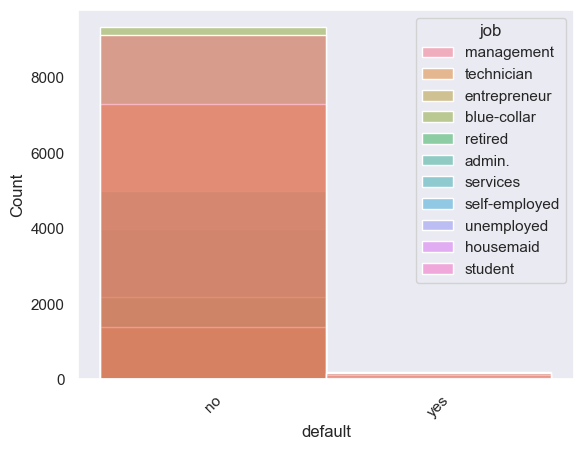

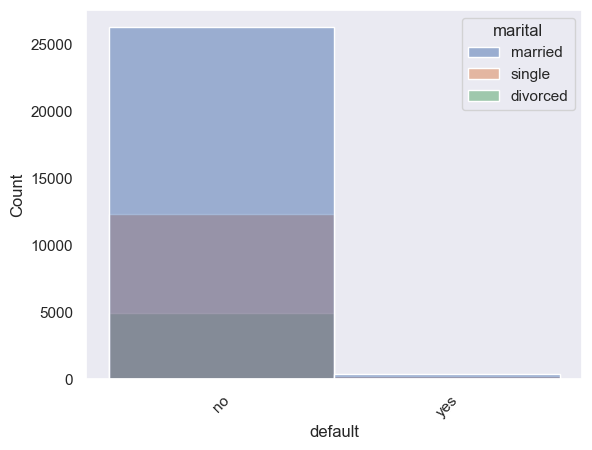

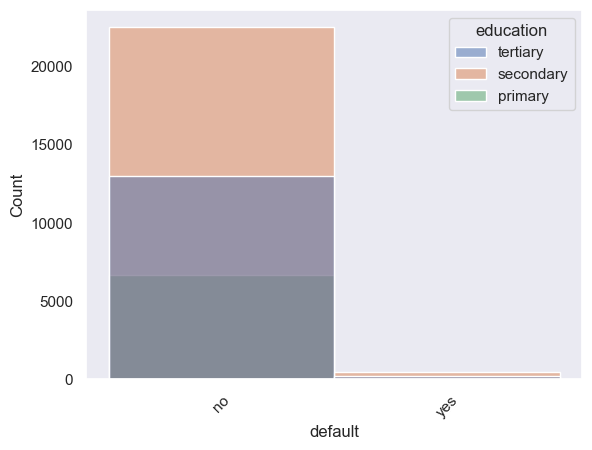

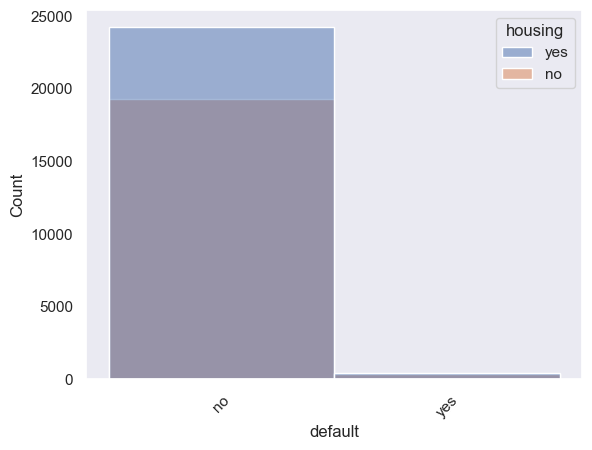

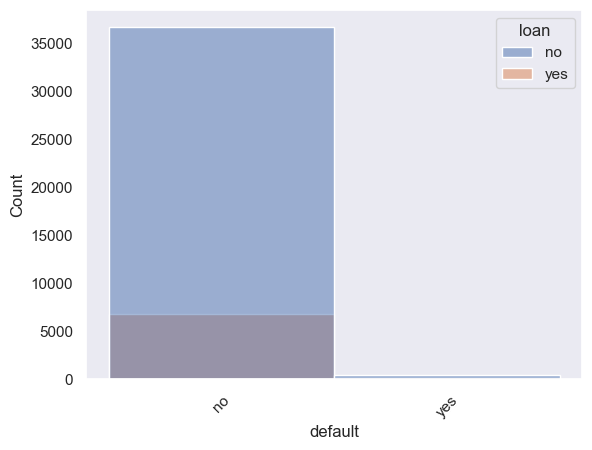

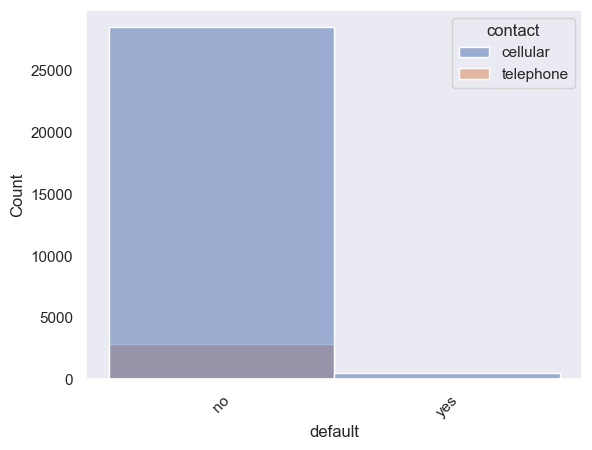

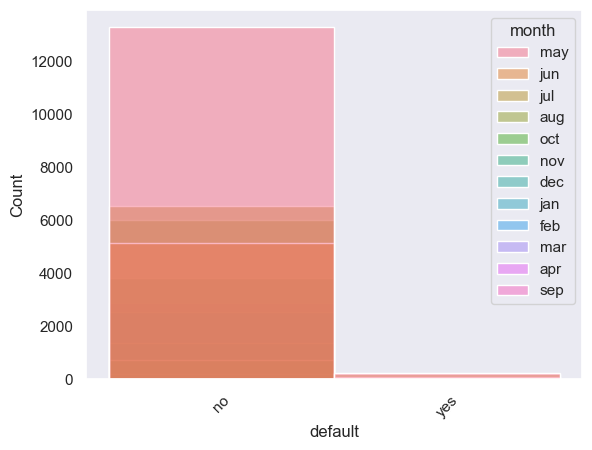

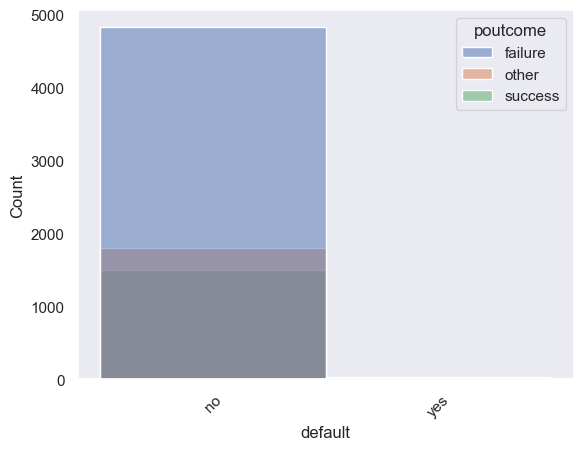

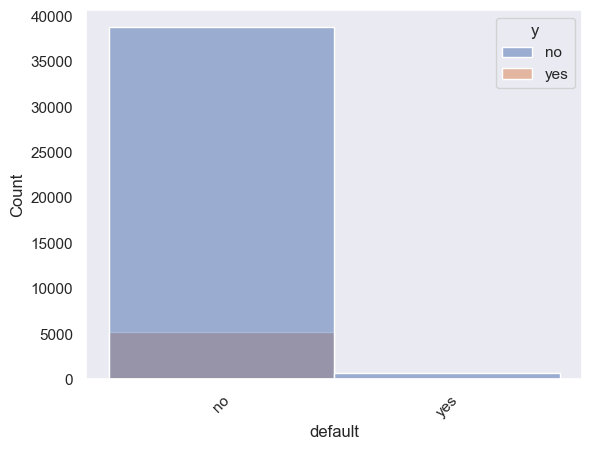

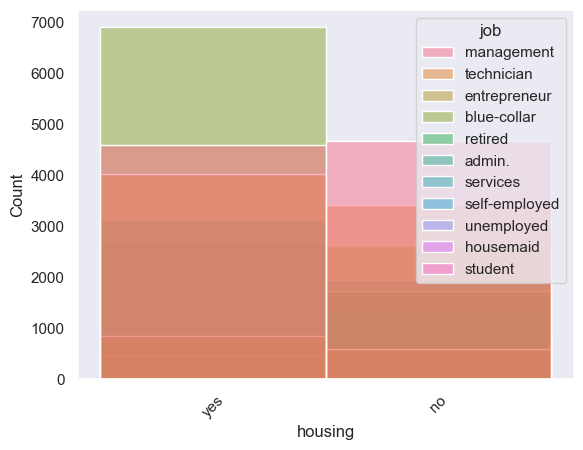

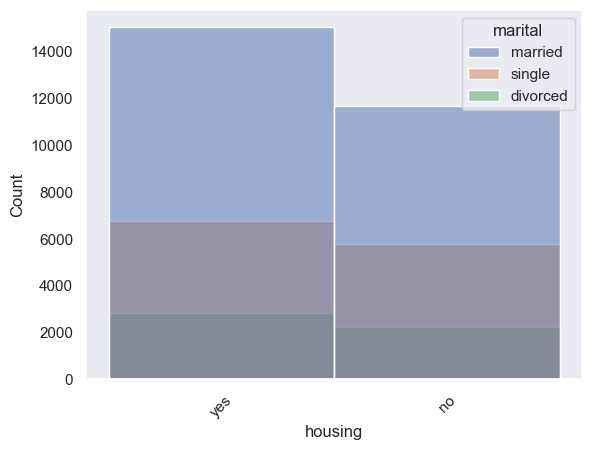

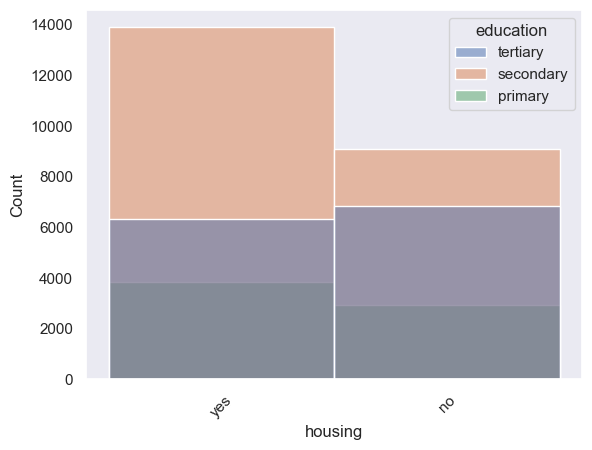

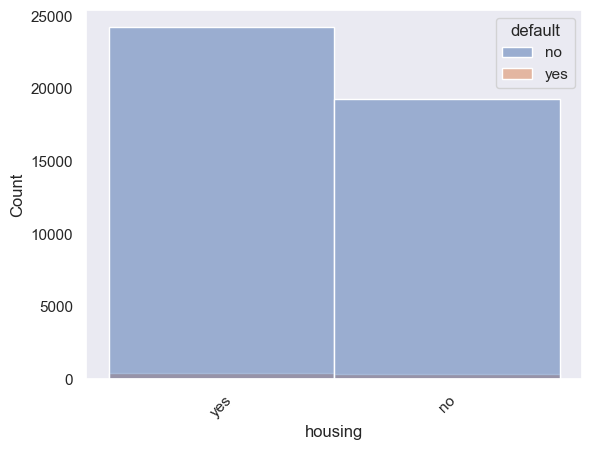

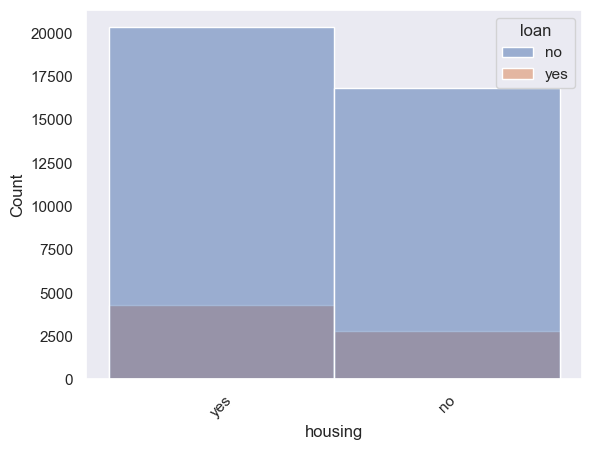

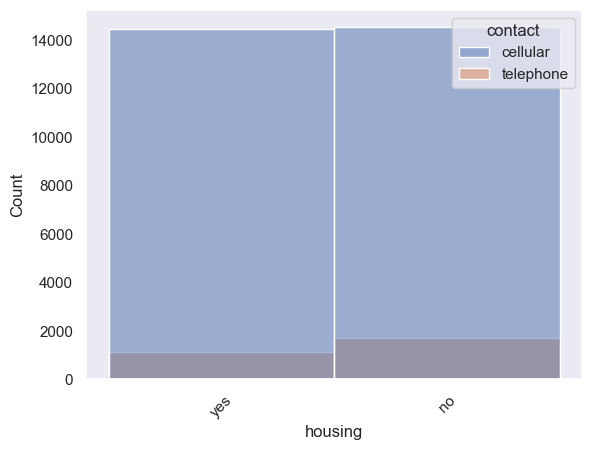

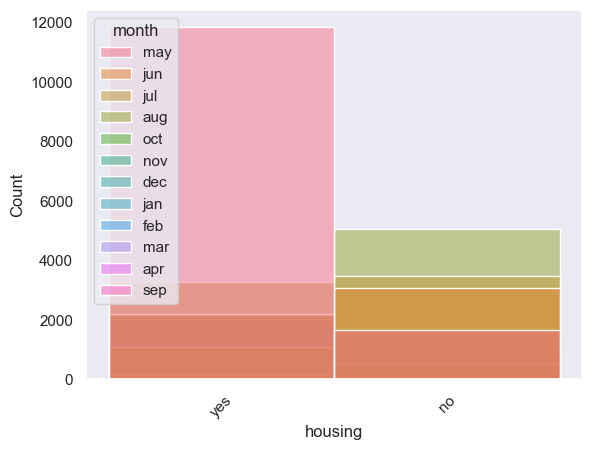

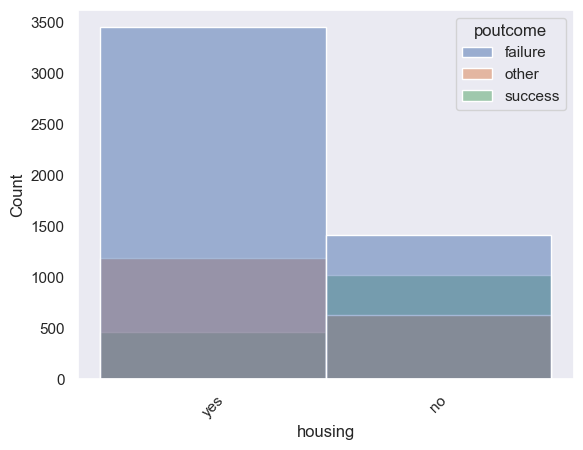

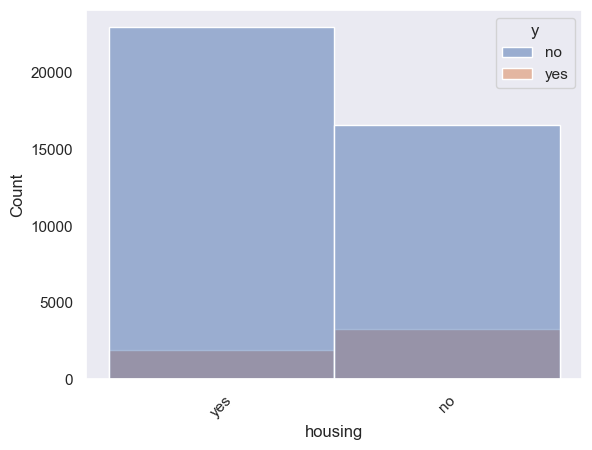

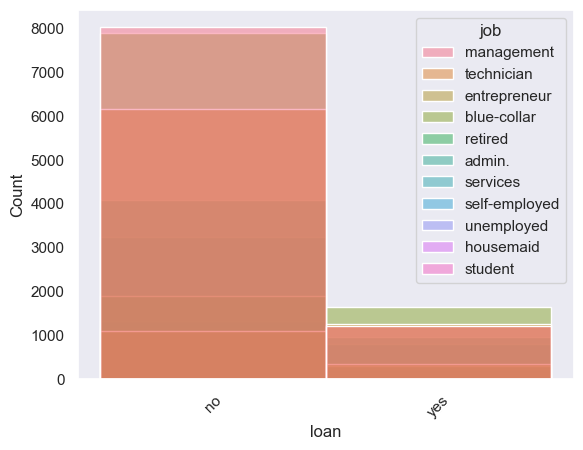

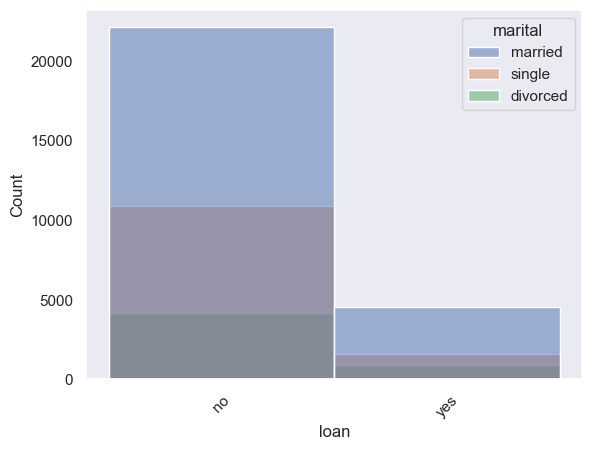

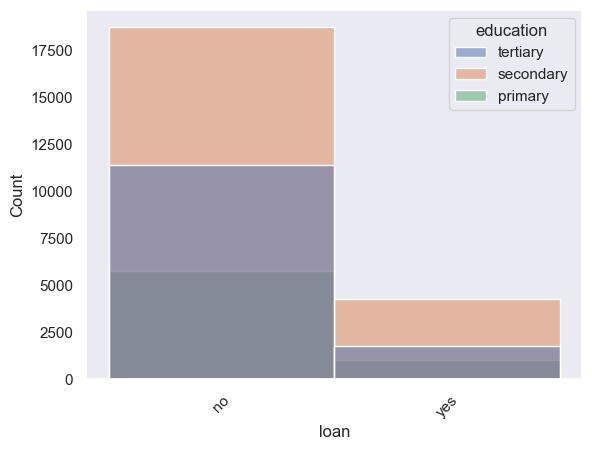

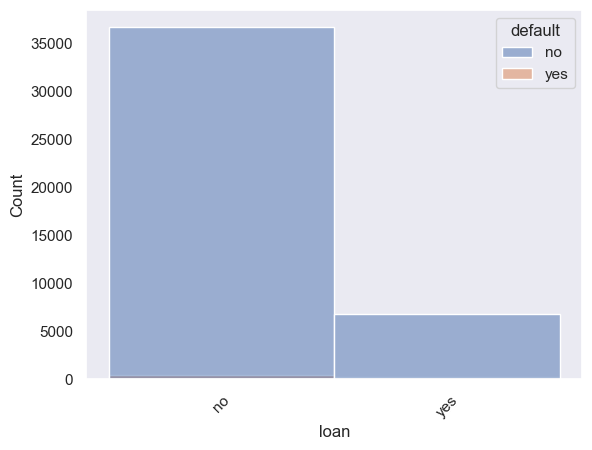

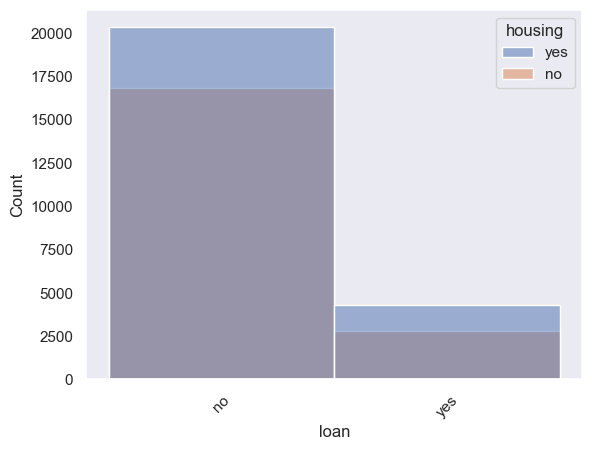

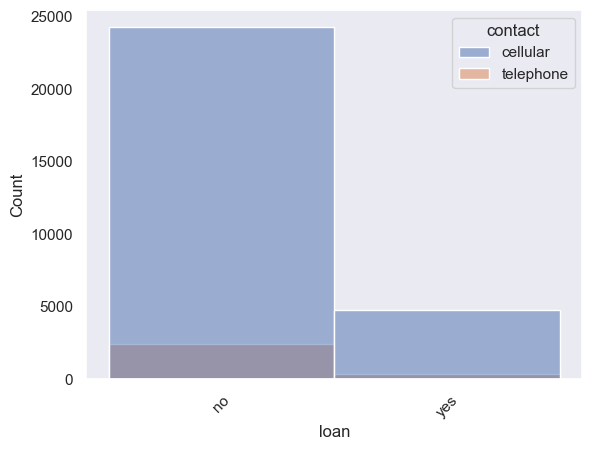

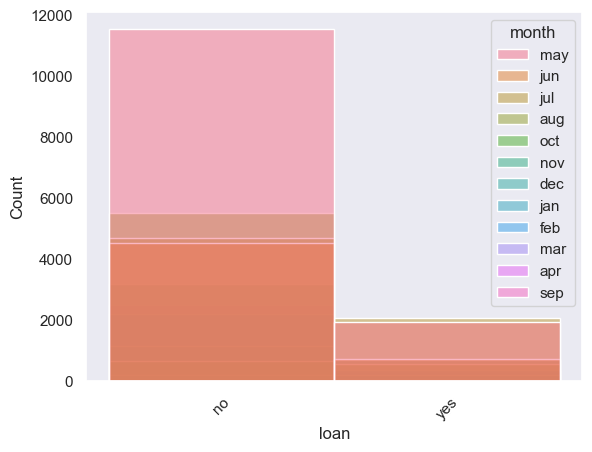

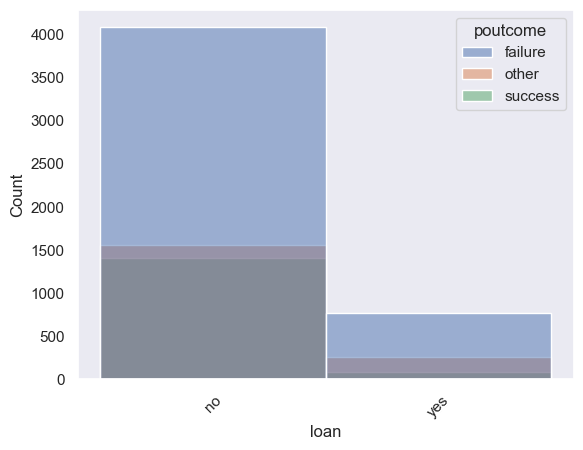

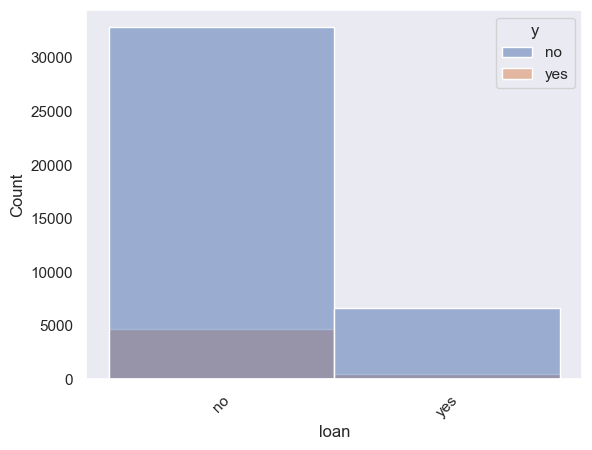

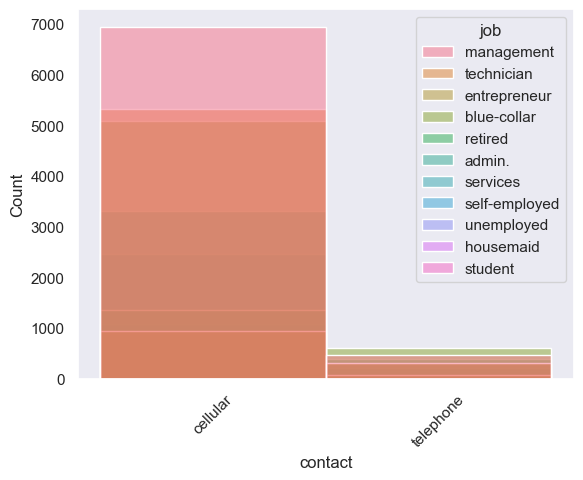

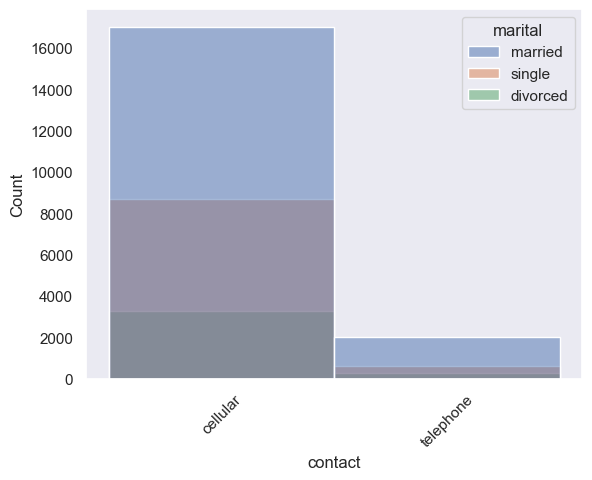

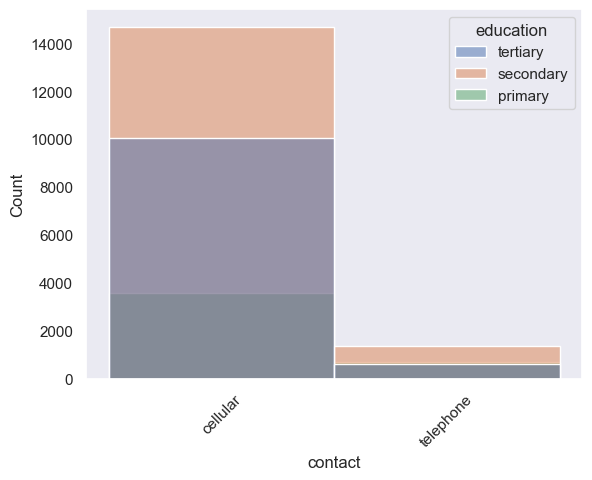

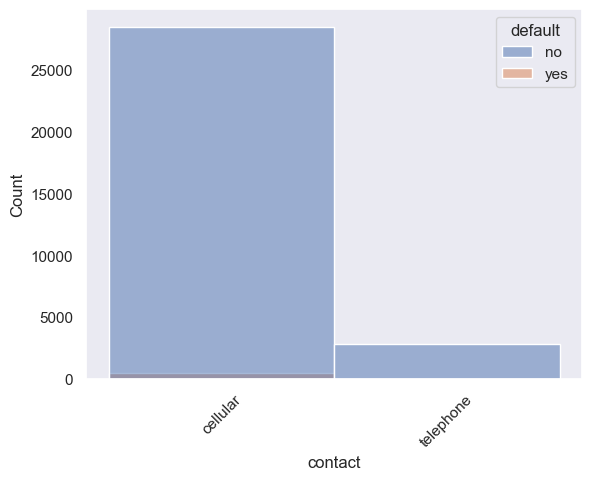

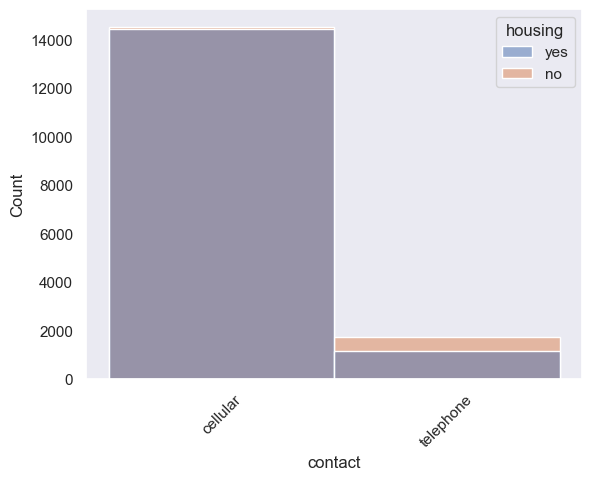

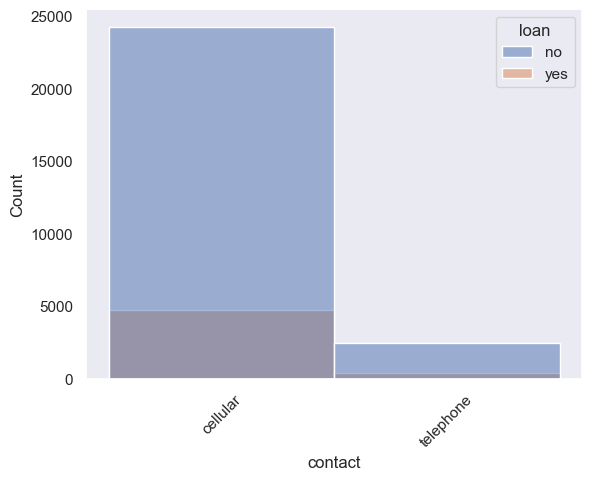

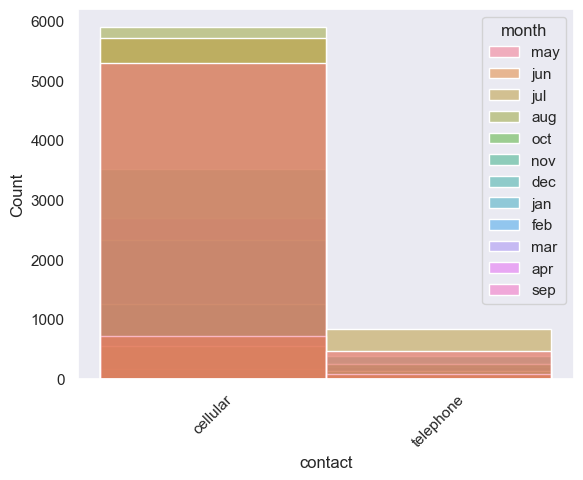

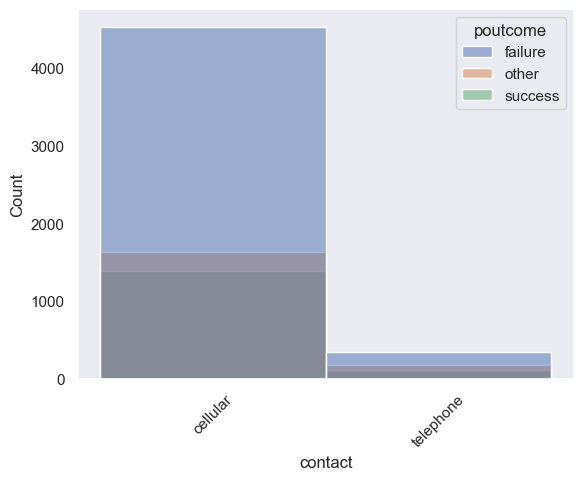

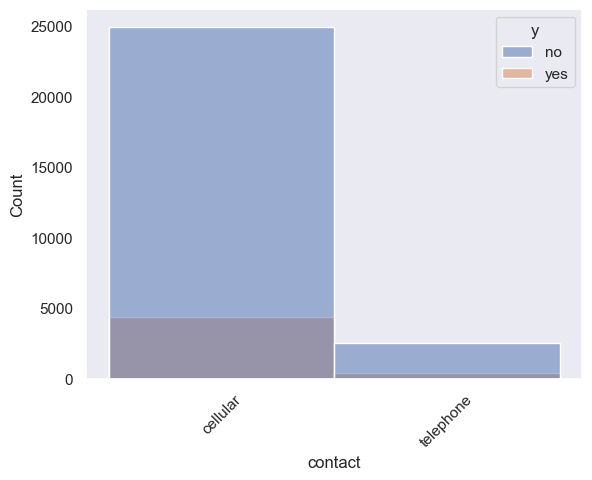

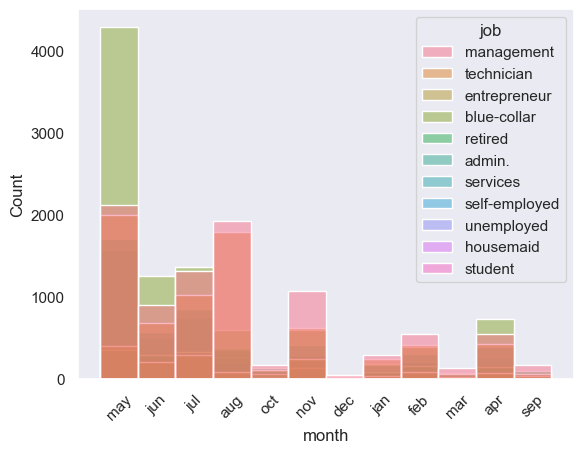

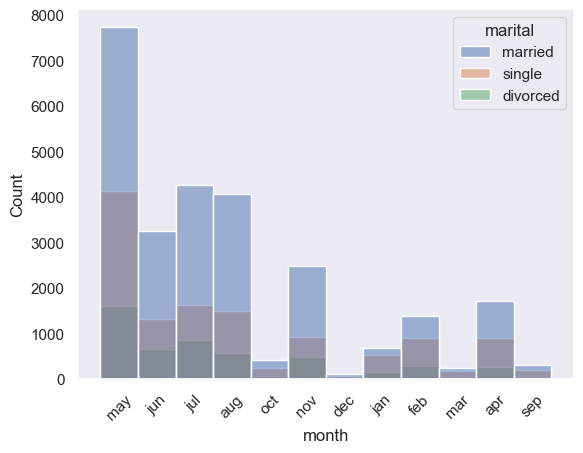

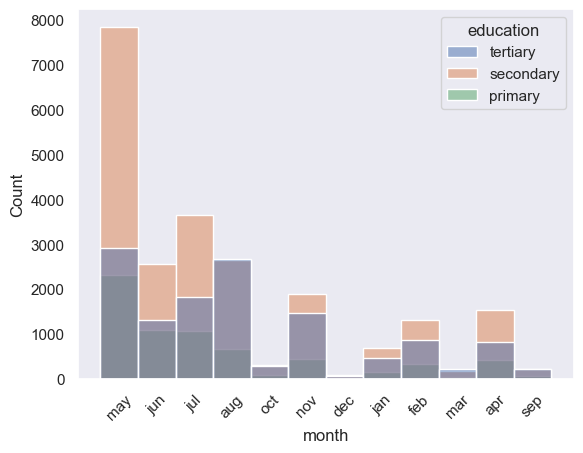

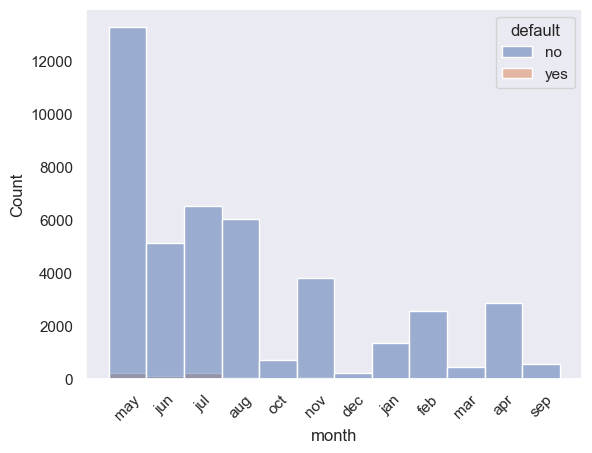

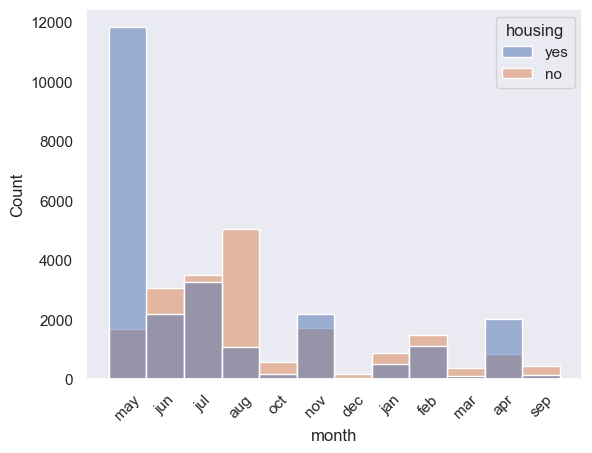

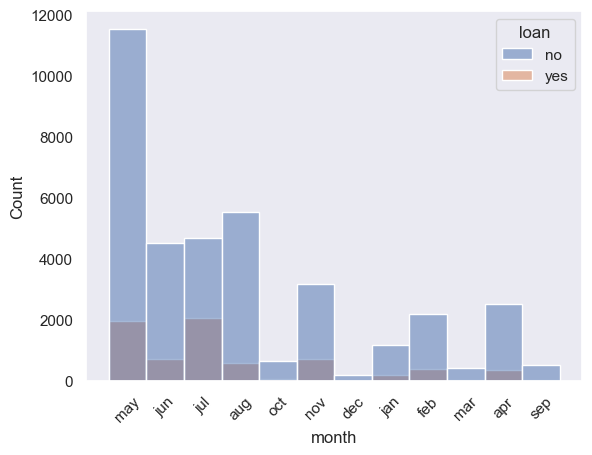

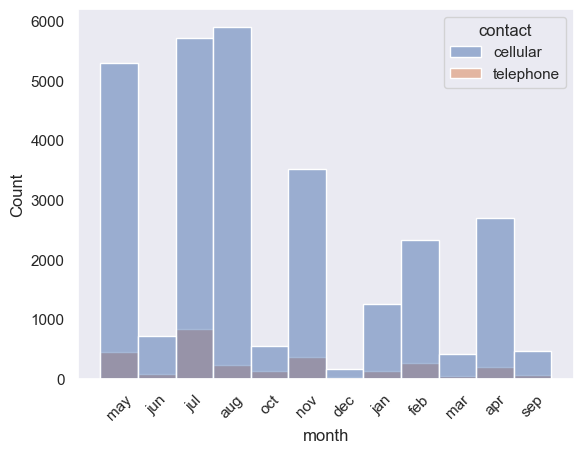

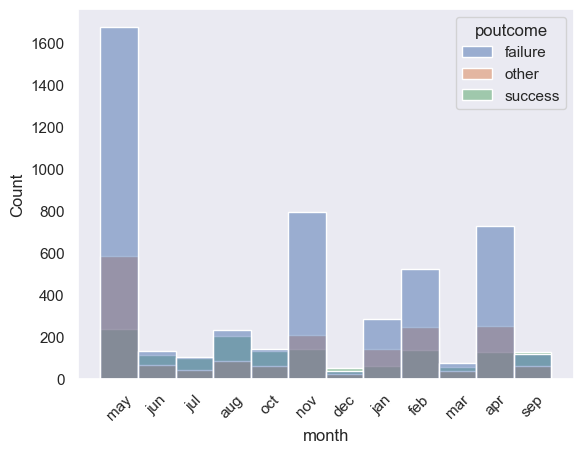

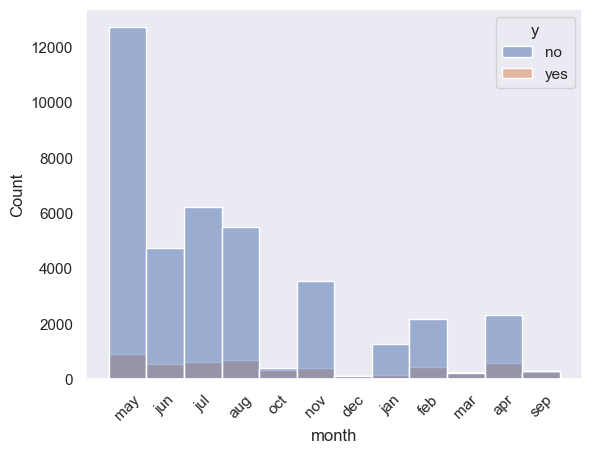

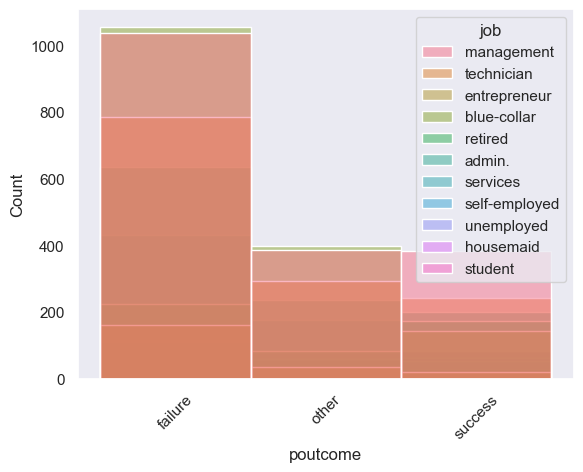

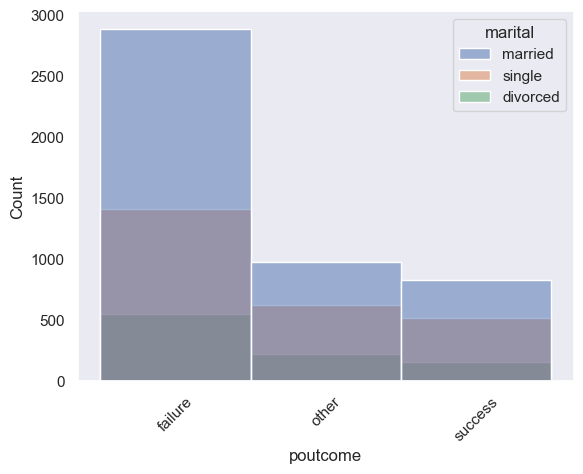

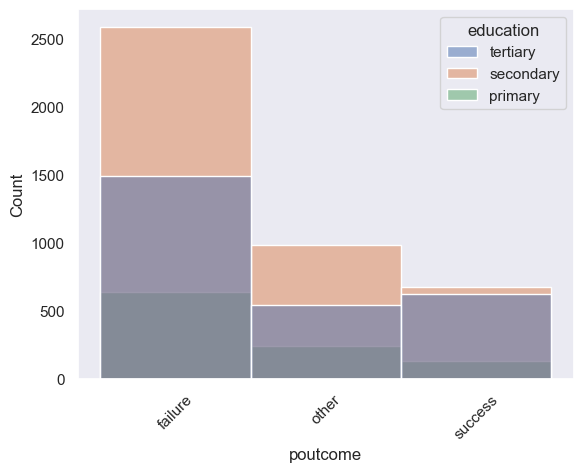

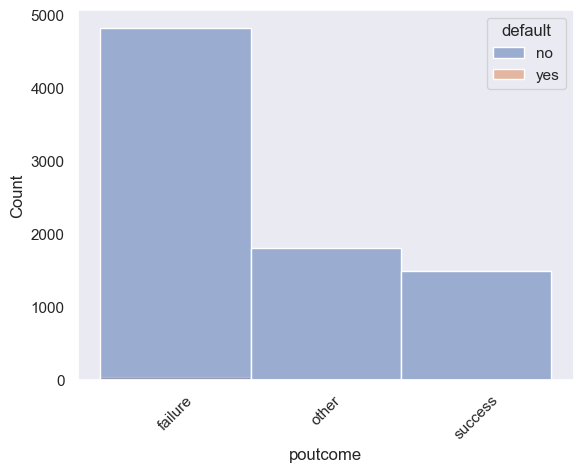

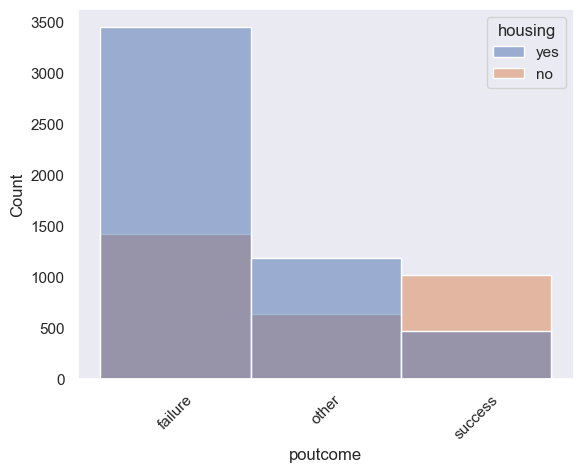

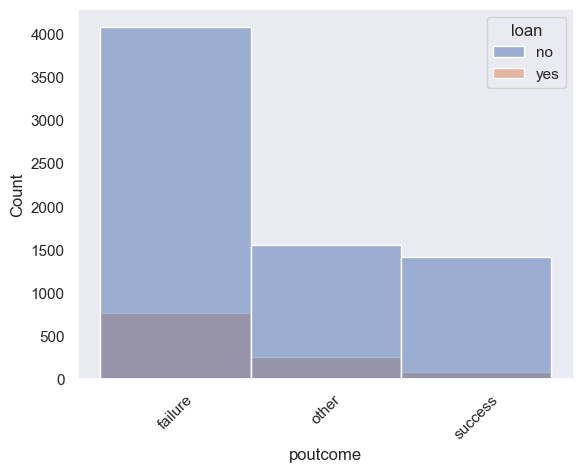

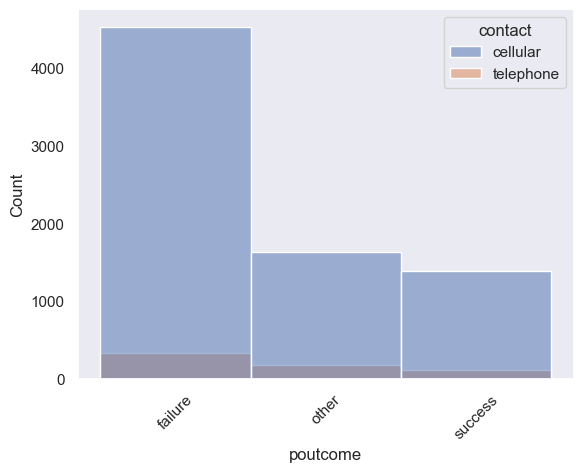

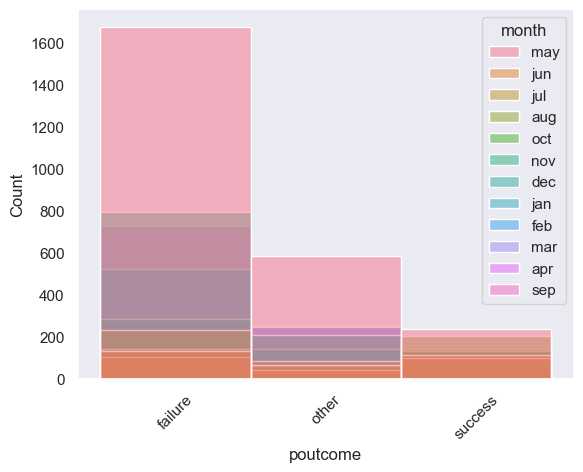

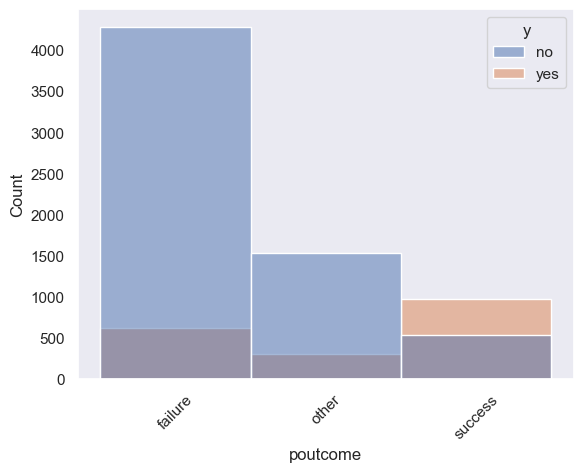

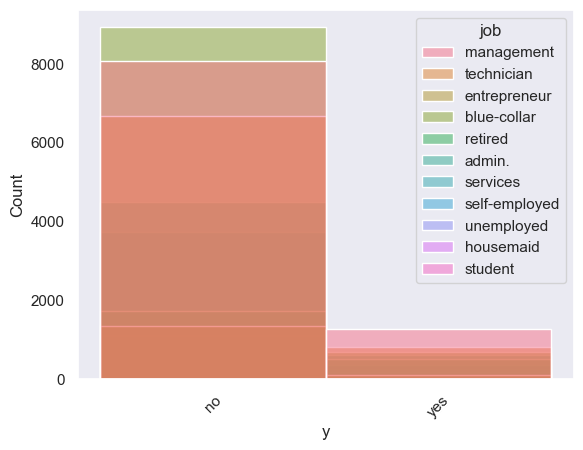

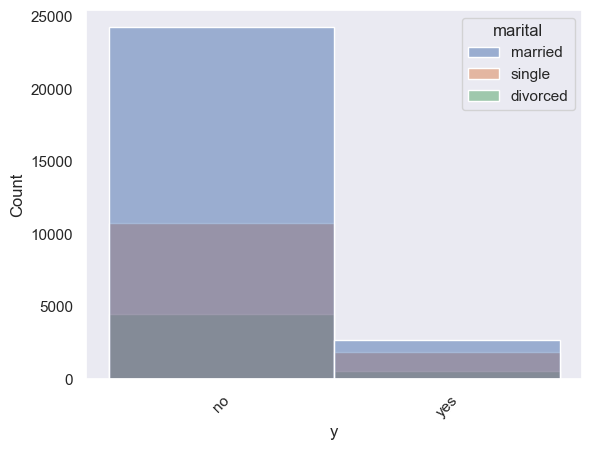

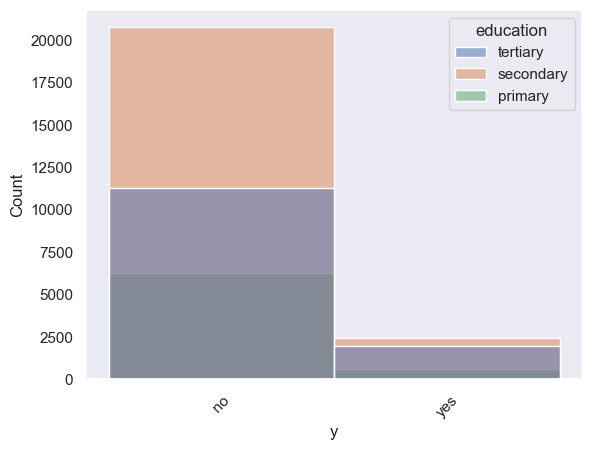

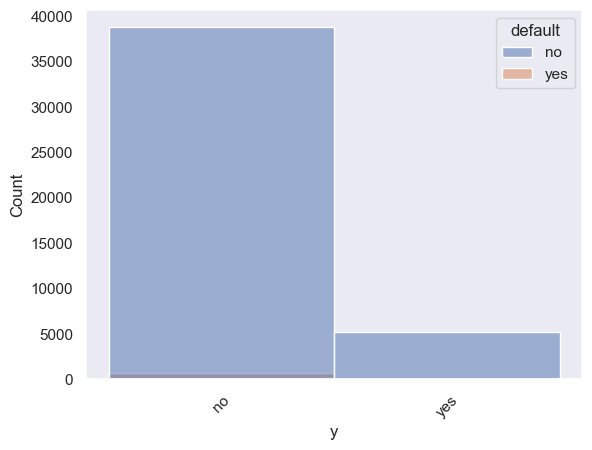

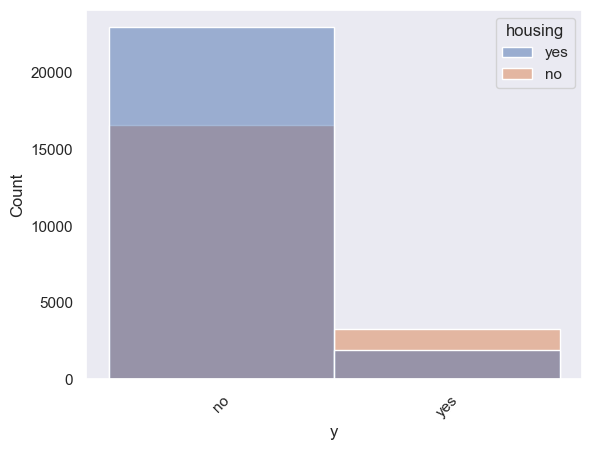

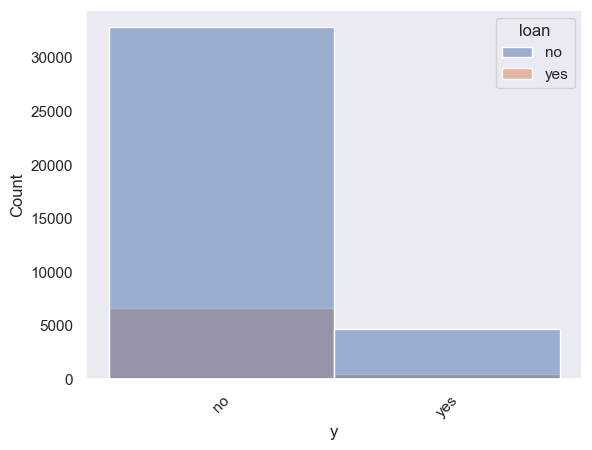

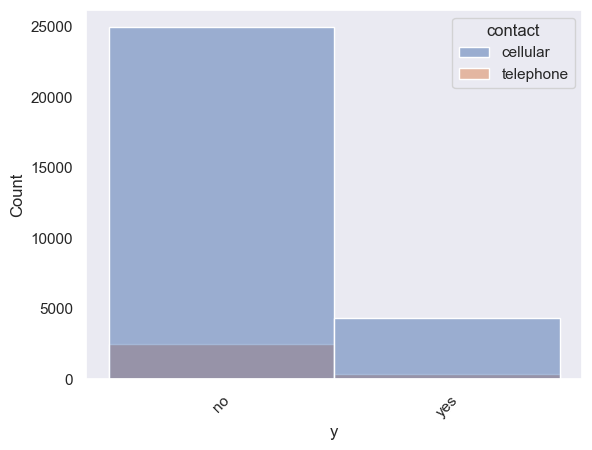

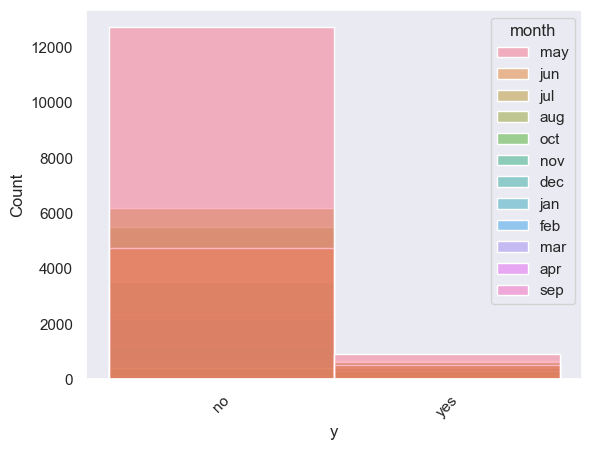

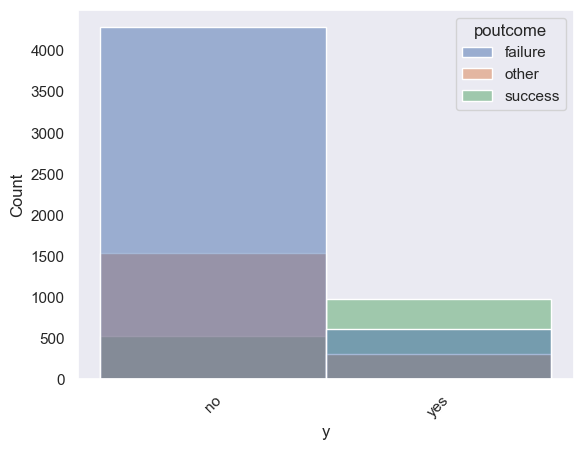

In [38]:
qualitatives = df.select_dtypes(include="object")
quantitatives = df.select_dtypes(exclude="object")

for c in qualitatives.columns:
    for c2 in qualitatives.columns:
        if c != c2:
            ax = sns.histplot(x=c, hue=c2, data=df)
            plt.xticks(rotation=45)
            plt.show()
    

Q7. Faites une analyse des corrélations entre les différentes colonnes (2-à-2).

Note : il s'agit normalement d'une analyse bivariée textuelle (le résultat est un coefficient de corrélation), mais, pour faciliter la lecture, vous pouvez l'afficher sous forme graphique en utilisant une [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html). Chaque case $C_{i,j}$ représente alors, sous forme de couleur, le coefficient de corrélation entre la colonne $i$ et la colonne $j$.

<details>
<summary>Astuce</summary>

Pour simplifier les corrélations avec des variables catégorielles, on peut utiliser [`pd.factorize()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) pour les transformer en numérique d'abord (sorte d'encodage ordinal naïf).
</details>

<Axes: >

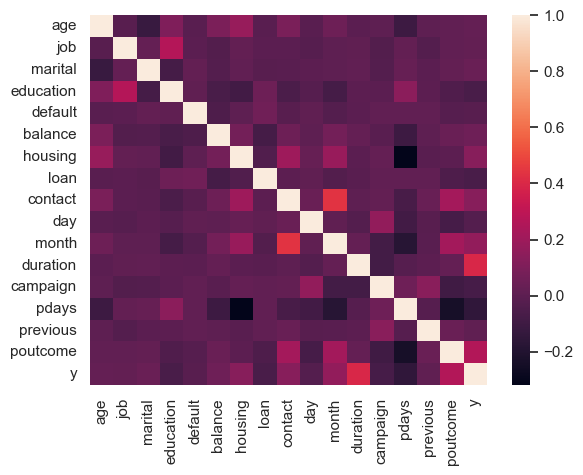

In [39]:
# calculate correlation matrix
df_corr = df.copy()
for c in qualitatives.columns:
    df_corr[c] = pd.factorize(df[c])[0]

corr = df_corr.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
 

## Exercice 2 : Nettoyage et préparation des données

Maintenant que l'on a quelques informations sur les données, nous allons pouvoir nettoyer et préparer le jeu de données pour le rendre utilisable par l'algorithme de ML.

Si le choix de l'algorithme influe sur votre réponse à une question, considérez que nous allons faire une Régression Logistique.

Q1. Existe-t-il des colonnes qui contiennent trop de valeurs manquantes (*NA*) pour être utilisables ? Supprimez-les.

<Axes: >

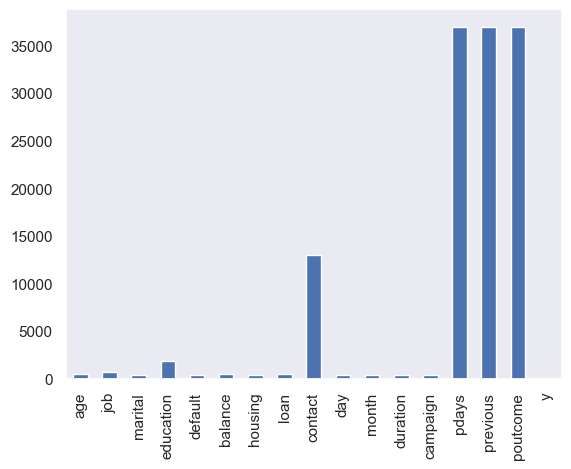

In [40]:
# calcul de la quantité de données manquantes dans chaque colonne
df.isnull().sum().plot(kind="bar")

In [41]:
# je drop "contact" parce que mon PC est pas tres puissant
df_drop_col = df.drop(columns=["contact", "pdays", "previous", "poutcome"])

Q2. Existe-t-il des lignes qui contiennent trop de valeurs manquantes (*NA*) pour être utilisables ? Supprimez-les.

Note : vous pouvez d'abord supprimer les lignes puis les colonnes, ça ne change pas grand-chose. Si vous avez déjà supprimé ces données durant l'EDA, bravo, vous pouvez passer directement aux questions suivantes :-)

In [61]:
# je drop les lignes avec des valeurs manquantes
l_start = df.shape[0]
df_frop_col_drop_na = df_drop_col.dropna()
print(f'{l_start - df_frop_col_drop_na.shape[0]} lignes supprimées')
df_filtered = df_frop_col_drop_na.copy()

6561 lignes supprimées


<Axes: >

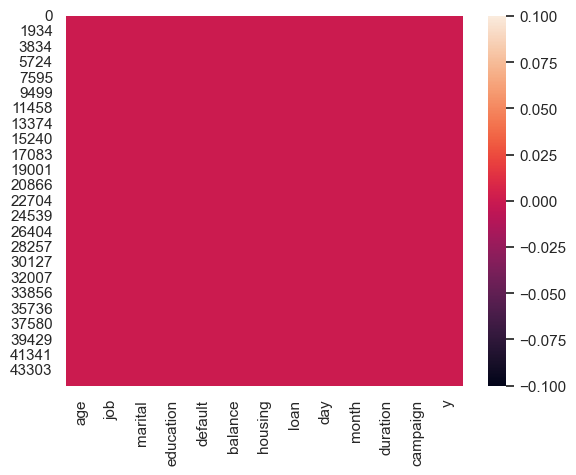

In [59]:
sns.heatmap(df_filtered.isnull())

Q3. Que penser de la colonne `duration` par rapport à la *target* `y` ? Est-il réaliste de considérer que nous aurons cette valeur pour la prédiction ? Qu'en conclure, comment doit-on traiter la colonne `duration` ?

Dans la tache ou on veux savoir qui on doit appeler, on ne peut pas utiliser la durée de l'appel, car on ne la connait pas avant d'appeler. On doit donc supprimer cette colonne.

In [62]:
df_filtered.drop(columns=["duration"], inplace=True)

Q4. Nous allons maintenant préparer et optimiser les données. Pour chaque colonne, quelle sorte d'encodage ou de normalisation vous semble appropriée ?

On rappelle les encodages : label, ordinal, one-hot, binaire (pas d'embedding ici).
Et les normalisations : linéaire (min-max), z-norm, log-scale ; avec ou sans clipping pour chacune d'entre elles.

Attention : certaines variables qui apparaissent comme qualitatives dans le *dataset* peuvent être intéressantes à convertir en quantitatif !

Si plusieurs pistes vous semblent intéressantes, vous pouvez toujours essayer chacune d'entre elles et comparer les performances (mais ça demande à tester beaucoup de modèles => explosion combinatoire !).

<details>
<summary>Astuce</summary>

Vous pouvez implémenter les normalisations à la main, car elles sont assez simples à faire en NumPy. En revanche, pour les encodages, et en particulier one-hot, il peut être assez fastidieux de compter le nombre d'éléments uniques, puis de générer n colonnes et de mettre la bonne valeur pour chaque colonne. Vous pouvez utiliser le module [preprocessing de Scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html) pour vous faciliter la vie. Voir en particulier [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).

Scikit suppose que vous passerez en entrée votre jeu de données entier dans un encodeur (c'est-à-dire un tableau 2D : individus et *features*). Quand on veut convertir 1 seule colonne, il faut forcer la conversion en tableau 2D quand même (c'est le retour de *reshape* !). Si votre jeu de données a une shape `(n, k)` avec `n` lignes et `k` *features*, une unique colonne a une shape `(n,)`, on veut obtenir à la place `(n,1)`.

Voici un exemple pour vous aider :

```python
X = np.asarray([
    [1, 2, 3],    # 1er individu
    [4, 5, 6],    # 2e individu
])

print(X.shape)
> (2, 3)
# 2 individus, 3 features

# On veut la 2e colonne (d'indice 1)
column = X[:, 1]

print(column.shape)
> (2,)
# 2 individus (Tableau 1D !!!)

column = column.reshape(-1, 1)
print(column.shape)
> (2,1)
# Toujours 2 individus et toujours 1 seule feature mais cette fois en 2D !

encoder = OneHotEncoder(...)          # À vous de remplir cette partie ;-)
column_encoded = encoder....(column)  # Ici aussi !

print(column_encoded.shape)
> (2,2)
# Toujours 2 individus mais l'encodage prend 2 colonnes car OneHot : autant de colonnes que de valeurs uniques...
```

Notez que, une fois l'encodage effectué par `OneHotEncoder`, on obtient plusieurs colonnes : il faut donc les nommer ! On pourra utiliser la méthode [`OneHotEncoder.get_feature_names_out()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.get_feature_names_out) pour générer les noms pour chaque colonne à partir du nom "originel" de la *feature*.

Par exemple, si la colonne s'appelait `"job"` et que l'on a les valeurs `["commercial", "prof", "étudiant"]`, alors `encoder.get_feature_names_out(["job"])` aura pour valeurs `["job_commercial", "job_prof", "job_étudiant"]`. Il vous reste alors à assigner chacune des colonnes encodées avec son nom correspondant dans votre DataFrame résultat.
</details>

In [44]:
### Votre réponse ici

## Exercice 3 : Apprentissage d'un modèle et mesures de performance

Dans cet exercice, nous allons (enfin !) apprendre un modèle et l'utiliser pour réaliser des prédictions, à partir des données que vous avez soigneusement préparé. Nous comparerons plusieurs modèles et sélectionnerons celui qui donne les meilleurs résultats ... en fonction des métriques choisies.

Q1. Divisez le *dataset* `df` en `X_train`, `Y_train`, `X_test`, et `Y_test`. On veut que 20% des données soient réservées à l'ensemble de test.

Attention ! Vous avez (ou auriez) dû remarquer dans l'exercice 1 que les classes étaient fortement déséquilibrées ! Il y a beaucoup plus de gens qui ne souscrivent pas de prêt. Une division "naïve" des données (par exemple en prenant les 20% dernières lignes, ou en prenant 20% de lignes au hasard) pourrait, si nous n'avons pas de chance, nous donner un jeu d'entraînement avec que des exemples négatifs (classe=0), et un jeu de test avec que des exemples positifs (classe=1). Bon courage pour apprendre un modèle avec ça...

Il nous faut donc être un peu plus malins, et prendre à peu près autant d'exemples positifs dans les données *train* que dans *test*.

Vous pouvez vous aider de la fonction [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) qui peut être configurée pour ce genre de cas.

In [45]:
### Votre réponse ici

Q1bis. Vérifiez que vous avez à peu près autant de classes positives que de négatives dans *train* et *test*.

In [46]:
### Votre réponse ici

Nous allons comparer l'influence du taux d'apprentissage $\alpha$ sur divers modèles de Régression Logistique avec descente de gradient.

Si vous aviez réussi le TP1 jusqu'au bout, vous pouvez ré-utiliser votre algorithme de régression logistique tel quel.

Sinon, vous pouvez utiliser un modèle "tout prêt" de Scikit-learn. Ces modèles sont ultra-optimisés et disposent de (très) nombreuses améliorations que nous n'aurons jamais le temps de détailler, nous allons donc les simplifier un peu pour qu'ils soient comparables à l'algorithme de Régression Logistique vu en cours (et pour que vous puissiez configurer leurs hyperparamètres).

```python
from sklearn.linear_model import SGDClassifier

alpha = 0.0001
nb_iter = 10_000

classifier = SGDClassifier(
    loss='log_loss',
    penalty=None,
    learning_rate='constant',
    max_iter=nb_iter, # VOTRE NOMBRE D'ITÉRATIONS ICI
    eta0=alpha        # VOTRE LEARNING RATE ICI
)

# Entraînement
classifier.fit(X_train, Y_train)

# Test
predictions_probas = classifier.predict_proba(X_test)
# On prend la colonne 1 car on veut la probabilité d'appartenir à la classe 1
# On compare à un seuil de 0.5 pour avoir des prédictions `True` ou `False`
predictions = predictions_probas[:, 1] >= 0.5
```

Q2. Apprenez un modèle sur les données d'entraînement, puis affichez la matrice de confusion sur les données de test.

Nous considérerons pour l'instant un seuil de $0.5$, c'est-à-dire qu'une prédiction (probabilité) inférieure à $0.5$ sera classée comme négatif, tandis qu'une prédiction (probabilité) supérieure ou égale à $0.5$ sera classée comme positive.

Note : vous n'êtes pas obligés d'afficher une "jolie" matrice, un simple : `print(TP = ..., FP = ..., FN = ..., TN = ...)` suffira.

In [47]:
### Votre réponse ici

À l'avenir, pour afficher de jolies matrices et les calculer automatiquement, Scikit peut là aussi vous aider :

- [`sklearn.metrics.ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) pour afficher des matrices (voire notamment les méthodes de classe `from_estimator()` et `from_predictions()`).
- [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) pour calculer les valeurs d'une matrice de confusion.

Vous êtes encouragés à implémenter vous-même le calcul pour ce TP, cela vous aidera à mieux retenir le fonctionnement des matrices de confusion ! Mais, pour faire simple, à l'avenir utilisez les outils déjà existants...

Q3. Le directeur de la banque en charge du projet vous a informé qu'il voulait rater le moins possible de clients potentiels, quitte à ce que quelques commerciaux perdent du temps à appeler des clients qui ne souscriront au final pas à un prêt. On ne veut toutefois pas prédire tous les clients en classe positive, car nous ne disposons pas d'une armée de commerciaux.

Quelle métrique, parmi celles que nous avons vues en cours, vous semble la plus appropriée ? Implémentez la fonction `perf_measure(predictions, labels)` qui correspond à cette métrique. 
Attention : dans cette fonction, `predictions` doit être un tableau de classes (0 ou 1), pas un tableau de probabilités ! Comme pour Q2, nous allons considérer un seuil de $0.5$.

In [48]:
### Votre réponse ici

Q4. On veut maintenant comparer l'influence de l'hyperparamètre $\alpha$ (taux d'apprentissage) sur la performance du modèle.

Effectuez une *cross-validation* pour comparer au moins 3 modèles différents, entraînés chacun avec un $\alpha$ différent. Quelle valeur de $k$ choisissez-vous ? Mesurez la performance à l'aide de votre fonction `perf_measure()`, pour chaque modèle, à chaque itération, et mémorisez ces performances dans un tableau `results`, de taille $(k, 3)$ (avec 3 le nombre de modèles testés, vous pouvez en comparer plus).

Attention : là encore, il faut que les classes soient équilibrées ! Je recommande l'utilisation de la stratégie [`sklearn.model_selection.StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) pour être sûr d'obtenir un bon résultat.

In [49]:
### Votre réponse ici

Q5. Quel modèle (donc taux d'apprentissage) a offert les meilleures performances en moyenne ? Entraînez le modèle correspondant sur l'ensemble des données d'entraînement (sans validation), et vérifiez sa performance sur les données de test.

In [50]:
### Votre réponse ici

Q6. On veut maintenant choisir le meilleur seuil de prédiction, par rapport au problème. Pour rappel, on veut manquer le moins de clients susceptibles de souscrire, sans toutefois prédire tous les clients en positif.

Affichez la courbe ROC de votre modèle. Vous pourrez vous aider à nouveau de Scikit-learn, grâce à sa classe [`sklearn.metrics.RocCurveDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) :

- Si vous avez utilisé votre propre algorithme de régression logistique, vous devrez obtenir les probabilités, et les fournir en entrée de [`RocCurveDisplay.from_predictions()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions)
- Si vous avez utilisé un algorithme de Scikit, vous pouvez directement le passer en entrée de [`RocCurveDisplay.from_estimator()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator) (sans avoir besoin d'obtenir les probabilités d'abord)

In [51]:
### Votre réponse ici

Q7. Identifiez le seuil idéal à partir de la courbe ROC. Sur l'affichage de la question précédente, les seuils ne sont pas accessibles, mais la visualisation aide à identifier à peu près quelles valeurs de TPR et FPR on cible.

Vous pouvez ensuite calculer les seuils correspondants grâce à la fonction [`sklearn.metrics.roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html), qui renvoie un tuple `(fpr, tpr, thresholds)`.

In [52]:
### Votre réponse ici

Qbonus. Comparez l'AUC de deux modèles entraînés sur l'ensemble des données d'entraînement.

Vous pouvez utiliser pour cela la fonction [`sklearn.metrics.roc_auc_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

In [53]:
### Votre réponse ici

## Exercice bonus : Jouons avec les embeddings

Les *embeddings* sont un moyen très puissant de gérer du texte en ML. Ils ont également comme avantage d'être ré-utilisables, une fois appris : vous trouverez d'ailleurs en ligne de trèèèèèèès nombreux *embeddings* pré-entraînés et prêts à être utilisés dans vos applications.

Toutefois, les *embeddings* ne sont pas une solution miracle ! En particulier, comme ils sont appris à partir des co-occurrences entre les mots dans un jeu de données (donc issu d'une activité humaine, à priori^[Bien que la proportion de données générées par des systèmes d'IA tend à augmenter ces récentes années, ce qui pose des soucis lorsqu'on fait du *web scraping* un peu à l'arrache : quelle portion des données vient réellement des humains ? Quelle portion vient d'un autre système automatique ? Quelle est la légitimité/fiabilité des données générées par un système appris à partir d'autres données générées ?]), les biais humains peuvent se retrouver dans ces *embeddings*.

Il existe un exemple assez connu de manipulation pseudo-sémantique des vecteurs : $king + woman - man = queen$.
Je vous propose, pour vous amuser, de découvrir d'autres équations qui soulèvent des problèmes de fond.

Note : cet exercice est complètement optionnel.

Q1. Chargez l'*embedding* GloVe fourni : il s'agit d'un fichier texte, avec, sur chaque ligne, le mot en première colonne, puis, séparés par des espaces, les valeurs du vecteur correspondant à ce mot.

Note : `glove.6B.50d` indique que l'*embedding* a été appris sur 6 milliards de tokens, et que les vecteurs ont 50 dimensions. Plus on augmente les données, meilleur est l'apprentissage ; plus on augmente les dimensions, plus le système peut apprendre finement les relations, mais les calculs sont plus coûteux. 6B.50d est l'un des plus petits *embeddings* "utilisables" (c'est-à-dire qu'il reste intéressant à utiliser en pratique).

In [54]:
### Votre réponse ici

Q2. Implémentez la fonction `cosine_similarity(a, b)` qui mesure la similarité entre 2 vecteurs `a` et `b`.

<details>
<summary>Rappel</summary>

Le cosinus peut se calculer via le produit scalaire et les normes ("longueurs") des vecteurs : $cos(a,b) = \frac{a \cdot b}{|a| |b|}$
</details>

In [55]:
### Votre réponse ici

Q3. Implémentez la fonction `best_candidates(target, k)` qui retourne les `k` plus proches vecteurs de `target`, parmi l'ensemble des vecteurs connus dans GloVe.

In [56]:
### Votre réponse ici

Q4. Vérifiez l'équation `king + woman - man = queen` grâce à vos fonctions.

Note : sur un si petit embedding, les manipulations "sémantiques" ne sont pas parfaites. Regardez les 10 premiers candidats pour être sûr.

In [57]:
### Votre réponse ici

Q5. Essayez maintenant sur l'équation `doctor + woman - man = ?`. Que conclure sur les *embeddings* ?

In [58]:
### Votre réponse ici

Q6. Essayez de trouver d'autres équations donnant des résultats inattendus ou indésirables !